**Data Architecture project** \
Master's degree course in Computer Science \
University of Milan - Bicocca \
A.Y. 2023-2024 \
\
Cavaleri Matteo - 875050 \
Gargiulo Elio - 869184 \
Piacente Cristian - 866020

# Preliminary analysis

## Import aggregated csv

In [427]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [526]:
# Import the aggregated metrics
df = pd.read_csv('../experiments_pipeline/aggregated_metrics.csv')

df.head()

experiment_name      model_name  accuracy  accuracy_interval_lower  \
0   experiment #1             SVM  0.740321                 0.743926   
1   experiment #1  Neural Network  0.809254                 0.838447   
2   experiment #1   Decision Tree  0.787535                 0.788408   
3   experiment #2             SVM  0.979226                 0.975209   
4   experiment #2  Neural Network  0.977337                 0.978805   

   accuracy_interval_upper  precision  precision_interval_lower  \
0                 0.745027   0.740321                  0.371963   
1                 0.853348   0.816993                  0.855759   
2                 0.808945   0.865359                  0.723522   
3                 0.984755   0.978643                  0.971815   
4                 0.986820   0.988432                  0.981618   

   precision_interval_upper    recall  recall_interval_lower  \
0                  0.372513  1.000000                    NaN   
1                  0.868357  0.956633               0.937439   
2                  0.749238  0.844388               0.726241   
3                  0.985081  0.993622               0.961223   
4                  0.992195  0.980867               0.987771   

   recall_interval_upper  f1_score  f1_score_interval_lower  \
0                    NaN  0.850787                 0.426581   
1               0.950937  0.881316                 0.896504   
2               0.749991  0.854745                 0.724852   
3               0.976450  0.986076                 0.967081   
4               0.992441  0.984635                 0.985827   

   f1_score_interval_upper  
0                 0.426943  
1                 0.905928  
2                 0.748685  
3                 0.979755  
4                 0.991146

In [527]:
# Add a new column experiment_id in the first position and drop experiment_name
df.insert(loc=0, column='experiment_id', value=df['experiment_name'].str.extract(r'#(\d+)').astype(int))
df.drop(columns=['experiment_name'], inplace=True)

# Make sure each metric is between 0 and 1 (for the 95% confidence intervals)
for col in df.columns[2:]:
    df[col] = df[col].clip(0, 1)

df.head()

experiment_id      model_name  accuracy  accuracy_interval_lower  \
0              1             SVM  0.740321                 0.743926   
1              1  Neural Network  0.809254                 0.838447   
2              1   Decision Tree  0.787535                 0.788408   
3              2             SVM  0.979226                 0.975209   
4              2  Neural Network  0.977337                 0.978805   

   accuracy_interval_upper  precision  precision_interval_lower  \
0                 0.745027   0.740321                  0.371963   
1                 0.853348   0.816993                  0.855759   
2                 0.808945   0.865359                  0.723522   
3                 0.984755   0.978643                  0.971815   
4                 0.986820   0.988432                  0.981618   

   precision_interval_upper    recall  recall_interval_lower  \
0                  0.372513  1.000000                    NaN   
1                  0.868357  0.956633               0.937439   
2                  0.749238  0.844388               0.726241   
3                  0.985081  0.993622               0.961223   
4                  0.992195  0.980867               0.987771   

   recall_interval_upper  f1_score  f1_score_interval_lower  \
0                    NaN  0.850787                 0.426581   
1               0.950937  0.881316                 0.896504   
2               0.749991  0.854745                 0.724852   
3               0.976450  0.986076                 0.967081   
4               0.992441  0.984635                 0.985827   

   f1_score_interval_upper  
0                 0.426943  
1                 0.905928  
2                 0.748685  
3                 0.979755  
4                 0.991146

## Import ML pipeline csv and concat

In [528]:
# Import the ML pipeline metrics
df_ml = pd.read_csv('../ml_pipeline/performance/metrics.csv')

# Add the experiment_id as 0 ("fake experiment" used in df)
df_ml.insert(0, 'experiment_id', [0, 0, 0])

df_ml.head()

experiment_id      model_name  accuracy  accuracy_interval_lower  \
0              0  Neural Network  0.983003                 0.981090   
1              0             SVM  0.985836                 0.983597   
2              0   Decision Tree  0.978281                 0.975099   

   accuracy_interval_upper  precision  precision_interval_lower  \
0                 0.987935   0.992288                  0.985490   
1                 0.986564   0.988564                  0.977246   
2                 0.982601   0.981037                  0.967651   

   precision_interval_upper    recall  recall_interval_lower  \
0                  0.992274  0.984694               0.986550   
1                  0.983993  0.992347               0.977659   
2                  0.975621  0.989796               0.965958   

   recall_interval_upper  f1_score  f1_score_interval_lower  \
0               0.994168  0.988476                 0.987309   
1               0.982869  0.990452                 0.978455   
2               0.979891  0.985397                 0.967159   

   f1_score_interval_upper  
0                 0.991903  
1                 0.982324  
2                 0.977260

In [529]:
# Keep the original DataFrame in another variable
df_original = df.copy()

# Concatenate the two DataFrames, to have one containing both metrics from experiment 0 and "real" experiments
df = pd.concat([df_ml, df], ignore_index=True)

df.head()

experiment_id      model_name  accuracy  accuracy_interval_lower  \
0              0  Neural Network  0.983003                 0.981090   
1              0             SVM  0.985836                 0.983597   
2              0   Decision Tree  0.978281                 0.975099   
3              1             SVM  0.740321                 0.743926   
4              1  Neural Network  0.809254                 0.838447   

   accuracy_interval_upper  precision  precision_interval_lower  \
0                 0.987935   0.992288                  0.985490   
1                 0.986564   0.988564                  0.977246   
2                 0.982601   0.981037                  0.967651   
3                 0.745027   0.740321                  0.371963   
4                 0.853348   0.816993                  0.855759   

   precision_interval_upper    recall  recall_interval_lower  \
0                  0.992274  0.984694               0.986550   
1                  0.983993  0.992347               0.977659   
2                  0.975621  0.989796               0.965958   
3                  0.372513  1.000000                    NaN   
4                  0.868357  0.956633               0.937439   

   recall_interval_upper  f1_score  f1_score_interval_lower  \
0               0.994168  0.988476                 0.987309   
1               0.982869  0.990452                 0.978455   
2               0.979891  0.985397                 0.967159   
3                    NaN  0.850787                 0.426581   
4               0.950937  0.881316                 0.896504   

   f1_score_interval_upper  
0                 0.991903  
1                 0.982324  
2                 0.977260  
3                 0.426943  
4                 0.905928

## Sub-DataFrames by model name

In [530]:
# Create different DataFrames, one for each model

model_names = df_original['model_name'].unique()

sub_df_dict = {
    model_name: df_original[df_original['model_name'] == model_name]
    for model_name in model_names
}

## Describe

In [531]:
df_original.describe()

experiment_id     accuracy  accuracy_interval_lower  \
count    2201.000000  2201.000000              2201.000000   
mean      304.639709     0.854638                 0.877778   
std       198.858469     0.219765                 0.140160   
min         1.000000     0.016997                 0.088087   
25%       113.000000     0.745042                 0.792038   
50%       295.000000     0.971671                 0.969357   
75%       479.000000     0.979226                 0.979791   
max       659.000000     0.985836                 0.994315   

       accuracy_interval_upper    precision  precision_interval_lower  \
count              2201.000000  2201.000000               2187.000000   
mean                  0.890307     0.869227                  0.835562   
std                   0.136744     0.231792                  0.211637   
min                   0.105386     0.000000                  0.000000   
25%                   0.811735     0.774704                  0.770017   
50%                   0.979147     0.979849                  0.959339   
75%                   0.987398     0.987163                  0.976944   
max                   0.998133     1.000000                  0.995063   

       precision_interval_upper       recall  recall_interval_lower  \
count               2187.000000  2201.000000            1975.000000   
mean                   0.852425     0.898623               0.889221   
std                    0.208359     0.254357               0.166375   
min                    0.103404     0.000000               0.000000   
25%                    0.798653     0.973214               0.886984   
50%                    0.975411     0.988520               0.963280   
75%                    0.988043     0.994898               0.980929   
max                    0.999380     1.000000               0.999307   

       recall_interval_upper     f1_score  f1_score_interval_lower  \
count            1975.000000  2201.000000              2187.000000   
mean                0.905596     0.876516                 0.838748   
std                 0.159403     0.240810                 0.207819   
min                 0.004010     0.000000                 0.000000   
25%                 0.909521     0.851550                 0.763943   
50%                 0.977949     0.980964                 0.961449   
75%                 0.990403     0.986076                 0.976016   
max                 1.000000     0.990440                 0.996188   

       f1_score_interval_upper  
count              2187.000000  
mean                  0.852343  
std                   0.205113  
min                   0.007938  
25%                   0.786215  
50%                   0.974515  
75%                   0.986242  
max                   0.998744

In [533]:
# SVM DataFrame
sub_df_dict['SVM'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     547.000000  547.000000               547.000000   
mean      381.021938    0.799511                 0.833819   
std       160.083047    0.241978                 0.132511   
min         1.000000    0.016997                 0.501505   
25%       245.500000    0.740321                 0.743926   
50%       382.000000    0.810198                 0.799174   
75%       518.500000    0.979226                 0.975655   
max       658.000000    0.983003                 0.982697   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               547.000000  547.000000                547.000000   
mean                  0.841496    0.784334                  0.692303   
std                   0.133955    0.282365                  0.279695   
min                   0.509234    0.000000                  0.212752   
25%                   0.745027    0.740321                  0.371963   
50%                   0.811088    0.858506                  0.777206   
75%                   0.985109    0.979221                  0.972340   
max                   0.987721    0.996769                  0.980613   

       precision_interval_upper      recall  recall_interval_lower  \
count                547.000000  547.000000             342.000000   
mean                   0.704457    0.892647               0.862482   
std                    0.283610    0.300819               0.152529   
min                    0.254617    0.000000               0.490113   
25%                    0.372513    0.993622               0.737199   
50%                    0.804001    0.993622               0.961052   
75%                    0.985215    1.000000               0.963280   
max                    0.987216    1.000000               0.979591   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             342.000000  547.000000               547.000000   
mean                0.879881    0.830496                 0.696829   
std                 0.149625    0.285025                 0.251429   
min                 0.499903    0.000000                 0.337015   
25%                 0.761408    0.850787                 0.426581   
50%                 0.976541    0.886376                 0.687591   
75%                 0.977997    0.986076                 0.967544   
max                 0.986017    0.988564                 0.980238   

       f1_score_interval_upper  
count               547.000000  
mean                  0.707601  
std                   0.255823  
min                   0.337412  
25%                   0.426943  
50%                   0.716292  
75%                   0.980118  
max                   0.985835

In [435]:
# SVM (mean) DataFrame
sub_df_dict['SVM (mean)'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     112.000000  112.000000               112.000000   
mean       80.812500    0.946749                 0.927342   
std       115.413517    0.091712                 0.081282   
min         6.000000    0.259679                 0.475551   
25%        33.750000    0.962937                 0.895289   
50%        61.500000    0.980170                 0.974796   
75%        89.250000    0.982059                 0.978368   
max       659.000000    0.983947                 0.980756   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               112.000000  112.000000                112.000000   
mean                  0.937511    0.941514                  0.936465   
std                   0.079014    0.111381                  0.092699   
min                   0.504833    0.000000                  0.327454   
25%                   0.907107    0.953687                  0.923067   
50%                   0.983794    0.978670                  0.972592   
75%                   0.985953    0.983565                  0.974440   
max                   0.987090    0.984810                  0.976885   

       precision_interval_upper      recall  recall_interval_lower  \
count                112.000000  112.000000             111.000000   
mean                   0.951311    0.986220               0.875581   
std                    0.084006    0.094075               0.129681   
min                    0.327873    0.000000               0.475388   
25%                    0.940725    0.992347               0.801909   
50%                    0.984647    0.994898               0.961346   
75%                    0.985741    0.997449               0.966926   
max                    0.987522    1.000000               0.970502   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             111.000000  112.000000               112.000000   
mean                0.893497    0.962008                 0.884488   
std                 0.124632    0.098833                 0.137161   
min                 0.504509    0.000000                 0.395510   
25%                 0.826072    0.975526                 0.839043   
50%                 0.975954    0.986675                 0.966292   
75%                 0.979268    0.987937                 0.971404   
max                 0.981284    0.989220                 0.974541   

       f1_score_interval_upper  
count               112.000000  
mean                  0.901622  
std                   0.129364  
min                   0.396042  
25%                   0.862433  
50%                   0.978458  
75%                   0.981416  
max                   0.982923

In [436]:
# SVM (EM) DataFrame
sub_df_dict['SVM (EM)'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     112.000000  112.000000               112.000000   
mean       80.812500    0.969319                 0.972579   
std       115.413517    0.075049                 0.060153   
min         6.000000    0.259679                 0.484978   
25%        33.750000    0.979226                 0.979792   
50%        61.500000    0.982059                 0.981173   
75%        89.250000    0.983003                 0.984653   
max       659.000000    0.985836                 0.994074   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               112.000000  112.000000                112.000000   
mean                  0.980198    0.970043                  0.966192   
std                   0.058741    0.098128                  0.079985   
min                   0.502484    0.000000                  0.327454   
25%                   0.987366    0.979899                  0.975815   
50%                   0.989030    0.983575                  0.977518   
75%                   0.991850    0.984829                  0.980580   
max                   0.997992    0.995885                  0.992302   

       precision_interval_upper      recall  recall_interval_lower  \
count                112.000000  112.000000             111.000000   
mean                   0.976966    0.981380               0.965801   
std                    0.079137    0.093978               0.058643   
min                    0.327873    0.000000               0.484859   
25%                    0.986980    0.990753               0.970020   
50%                    0.988505    0.992347               0.971822   
75%                    0.991006    0.993622               0.977892   
max                    0.998299    1.000000               0.991699   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             111.000000  112.000000               112.000000   
mean                0.976943    0.975317                 0.962713   
std                 0.054888    0.094821                 0.084145   
min                 0.502325    0.000000                 0.395737   
25%                 0.980999    0.986067                 0.973286   
50%                 0.983902    0.987921                 0.975120   
75%                 0.988363    0.988564                 0.979723   
max                 0.997135    0.990440                 0.992203   

       f1_score_interval_upper  
count               112.000000  
mean                  0.973308  
std                   0.079771  
min                   0.396042  
25%                   0.983261  
50%                   0.985477  
75%                   0.989238  
max                   0.997355

In [437]:
# Neural Network DataFrame
sub_df_dict['Neural Network'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     548.000000  548.000000               548.000000   
mean      380.326642    0.812464                 0.876259   
std       160.762730    0.242112                 0.125629   
min         0.000000    0.017941                 0.497646   
25%       244.750000    0.742210                 0.801199   
50%       381.500000    0.931067                 0.928525   
75%       518.250000    0.972616                 0.981436   
max       658.000000    0.984891                 0.990789   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               548.000000  548.000000                534.000000   
mean                  0.892687    0.825793                  0.879488   
std                   0.120620    0.267393                  0.146987   
min                   0.533148    0.000000                  0.000000   
25%                   0.825425    0.744534                  0.816489   
50%                   0.952579    0.958308                  0.955522   
75%                   0.988481    0.992087                  0.984848   
max                   0.995584    1.000000                  0.993394   

       precision_interval_upper      recall  recall_interval_lower  \
count                534.000000  548.000000             529.000000   
mean                   0.900851    0.874525               0.920569   
std                    0.126439    0.289408               0.172669   
min                    0.391415    0.000000               0.000000   
25%                    0.841393    0.949936               0.944172   
50%                    0.969875    0.988520               0.983397   
75%                    0.992736    0.998724               0.988274   
max                    0.997189    1.000000               0.999307   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             529.000000  548.000000               534.000000   
mean                0.935603    0.840117                 0.895374   
std                 0.165822    0.273687                 0.166014   
min                 0.004010    0.000000                 0.000000   
25%                 0.964359    0.851474                 0.878728   
50%                 0.992527    0.952761                 0.958384   
75%                 0.994776    0.981230                 0.987445   
max                 1.000000    0.989873                 0.993827   

       f1_score_interval_upper  
count               534.000000  
mean                  0.907825  
std                   0.158187  
min                   0.007938  
25%                   0.894640  
50%                   0.970719  
75%                   0.992245  
max                   0.997041

In [438]:
# Neural Network (mean) DataFrame
sub_df_dict['Neural Network (mean)'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     112.000000  112.000000               112.000000   
mean       80.812500    0.963282                 0.944559   
std       115.413517    0.077908                 0.068606   
min         6.000000    0.259679                 0.492334   
25%        33.750000    0.976393                 0.918047   
50%        61.500000    0.982059                 0.981888   
75%        89.250000    0.982059                 0.983637   
max       659.000000    0.984891                 0.986352   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               112.000000  112.000000                112.000000   
mean                  0.957774    0.967521                  0.947869   
std                   0.061236    0.100805                  0.068795   
min                   0.516966    0.000000                  0.473374   
25%                   0.937303    0.986740                  0.921476   
50%                   0.988598    0.987261                  0.984858   
75%                   0.989779    0.989667                  0.986456   
max                   0.992875    0.994792                  0.988676   

       precision_interval_upper      recall  recall_interval_lower  \
count                112.000000  112.000000             112.000000   
mean                   0.962195    0.976175               0.970353   
std                    0.058096    0.093913               0.086956   
min                    0.551779    0.000000               0.078171   
25%                    0.941217    0.981824               0.965036   
50%                    0.992444    0.988520               0.987962   
75%                    0.993138    0.988520               0.989442   
max                    0.995136    1.000000               0.996823   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             112.000000  112.000000               112.000000   
mean                0.982620    0.971369                 0.959511   
std                 0.057894    0.095652                 0.080999   
min                 0.393080    0.000000                 0.191614   
25%                 0.980729    0.983979                 0.945857   
50%                 0.994540    0.987867                 0.987852   
75%                 0.995784    0.987890                 0.989024   
max                 0.999383    0.989822                 0.990864   

       f1_score_interval_upper  
count               112.000000  
mean                  0.969419  
std                   0.063254  
min                   0.383612  
25%                   0.958694  
50%                   0.992355  
75%                   0.993145  
max                   0.995224

In [439]:
# Neural Network (EM) DataFrame
sub_df_dict['Neural Network (EM)'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     112.000000  112.000000               112.000000   
mean       80.812500    0.961824                 0.976356   
std       115.413517    0.073195                 0.055686   
min         6.000000    0.259679                 0.482534   
25%        33.750000    0.971671                 0.982810   
50%        61.500000    0.976393                 0.984038   
75%        89.250000    0.977337                 0.986703   
max       659.000000    0.980170                 0.994315   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               112.000000  112.000000                112.000000   
mean                  0.984530    0.972876                  0.979268   
std                   0.048903    0.098225                  0.057270   
min                   0.545378    0.000000                  0.463165   
25%                   0.990563    0.984679                  0.986011   
50%                   0.991438    0.989677                  0.987516   
75%                   0.993365    0.992139                  0.990023   
max                   0.998133    0.993515                  0.995063   

       precision_interval_upper      recall  recall_interval_lower  \
count                112.000000  112.000000             112.000000   
mean                   0.987842    0.967998               0.979875   
std                    0.045391    0.092695               0.085273   
min                    0.583807    0.000000               0.093683   
25%                    0.993935    0.974490               0.988181   
50%                    0.994542    0.978316               0.988941   
75%                    0.995568    0.980867               0.990546   
max                    0.999380    1.000000               0.996379   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             112.000000  112.000000               112.000000   
mean                0.988967    0.970072                 0.979685   
std                 0.071754    0.094089                 0.080886   
min                 0.240159    0.000000                 0.157196   
25%                 0.995991    0.980658                 0.988471   
50%                 0.996576    0.983912                 0.989286   
75%                 0.997593    0.984635                 0.991069   
max                 0.999726    0.986530                 0.996188   

       f1_score_interval_upper  
count               112.000000  
mean                  0.986256  
std                   0.064815  
min                   0.332716  
25%                   0.993675  
50%                   0.994259  
75%                   0.995557  
max                   0.998744

In [440]:
# Decision Tree DataFrame
sub_df_dict['Decision Tree'].describe()

experiment_id    accuracy  accuracy_interval_lower  \
count     660.000000  660.000000               660.000000   
mean      329.500000    0.864008                 0.863216   
std       190.669872    0.219311                 0.169570   
min         0.000000    0.020774                 0.088087   
25%       164.750000    0.887630                 0.808853   
50%       329.500000    0.974504                 0.966601   
75%       494.250000    0.979226                 0.974346   
max       659.000000    0.984891                 0.992259   

       accuracy_interval_upper   precision  precision_interval_lower  \
count               660.000000  660.000000                660.000000   
mean                  0.878370    0.912360                  0.836445   
std                   0.163346    0.177349                  0.183272   
min                   0.105386    0.000000                  0.086288   
25%                   0.827681    0.950205                  0.753429   
50%                   0.976391    0.982188                  0.954303   
75%                   0.984995    0.985934                  0.964178   
max                   0.996830    1.000000                  0.990346   

       precision_interval_upper      recall  recall_interval_lower  \
count                660.000000  660.000000             660.000000   
mean                   0.856754    0.870012               0.838479   
std                    0.178257    0.244869               0.184011   
min                    0.103404    0.000000               0.089667   
25%                    0.778053    0.898916               0.755181   
50%                    0.970436    0.984694               0.955392   
75%                    0.981399    0.988520               0.967382   
max                    0.996346    1.000000               0.988952   

       recall_interval_upper    f1_score  f1_score_interval_lower  \
count             660.000000  660.000000               660.000000   
mean                0.857933    0.881968                 0.837766   
std                 0.177700    0.221690                 0.184245   
min                 0.107212    0.000000                 0.087454   
25%                 0.778902    0.921003                 0.753841   
50%                 0.969334    0.982824                 0.956244   
75%                 0.981328    0.985938                 0.966401   
max                 0.996426    0.989848                 0.989807   

       f1_score_interval_upper  
count               660.000000  
mean                  0.856334  
std                   0.178042  
min                   0.104587  
25%                   0.778237  
50%                   0.968972  
75%                   0.980361  
max                   0.995827

In [441]:
# Create a DataFrame with the three types of SVM instance
all_svm_df = pd.concat([sub_df_dict['SVM'], sub_df_dict['SVM (mean)'], sub_df_dict['SVM (EM)']], ignore_index=True)

# Sort it by experiment ID and model name
all_svm_df = all_svm_df.sort_values(by=['experiment_id', 'model_name'])

In [442]:
# Create a DataFrame with the three types of NN instance
all_nn_df = pd.concat([sub_df_dict['Neural Network'], sub_df_dict['Neural Network (mean)'], sub_df_dict['Neural Network (EM)']], ignore_index=True)

# Sort it by experiment ID and model name
all_nn_df = all_nn_df.sort_values(by=['experiment_id', 'model_name'])

In [443]:
# DataFrame for Decision Tree
all_dtc_df = sub_df_dict['Decision Tree']

# Plots

## Metrics for each Sub-DataFrame

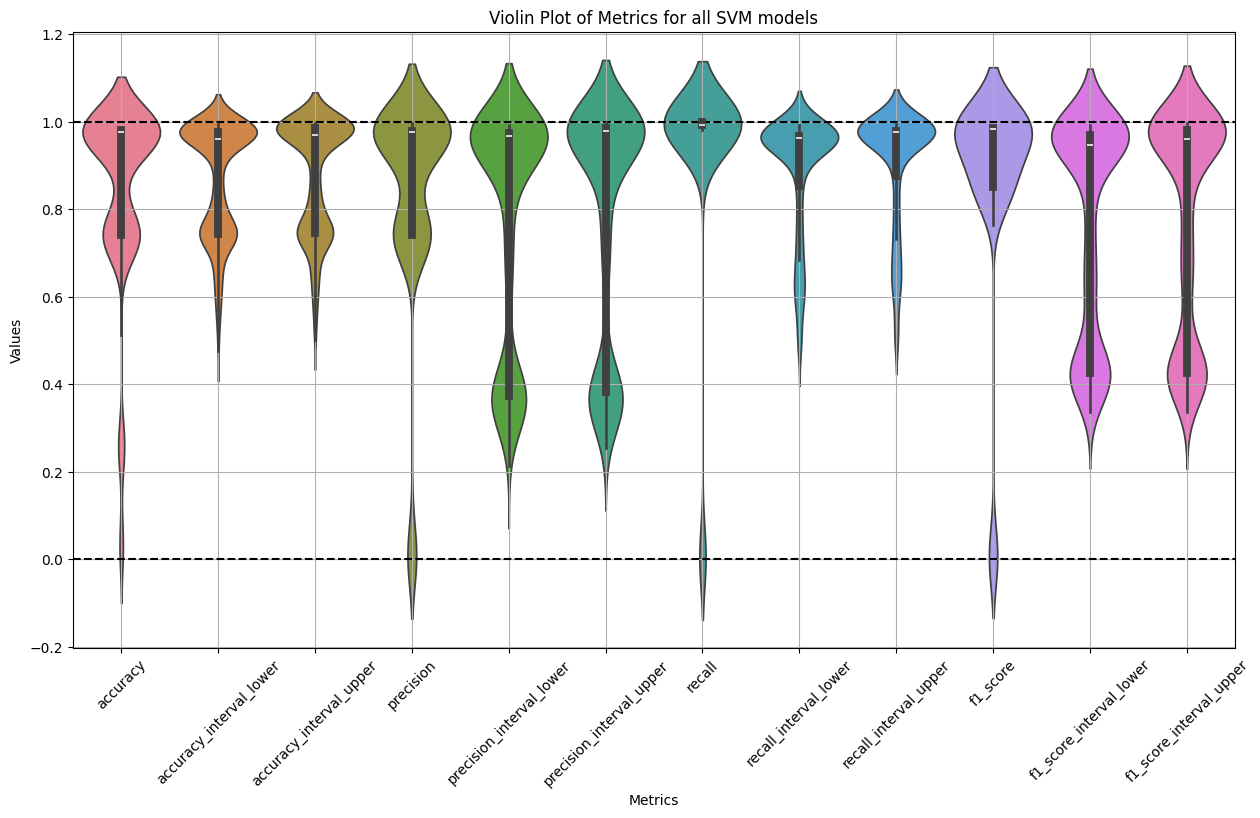

In [534]:
# Adding horizontal lines at 0.0 and 1.0
plt.figure(figsize=(15, 8))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=1.0, color='black', linestyle='--')

# Plotting the violin plot for all SVM models
sns.violinplot(data=all_svm_df[all_svm_df.columns[2:]])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot of Metrics for all SVM models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

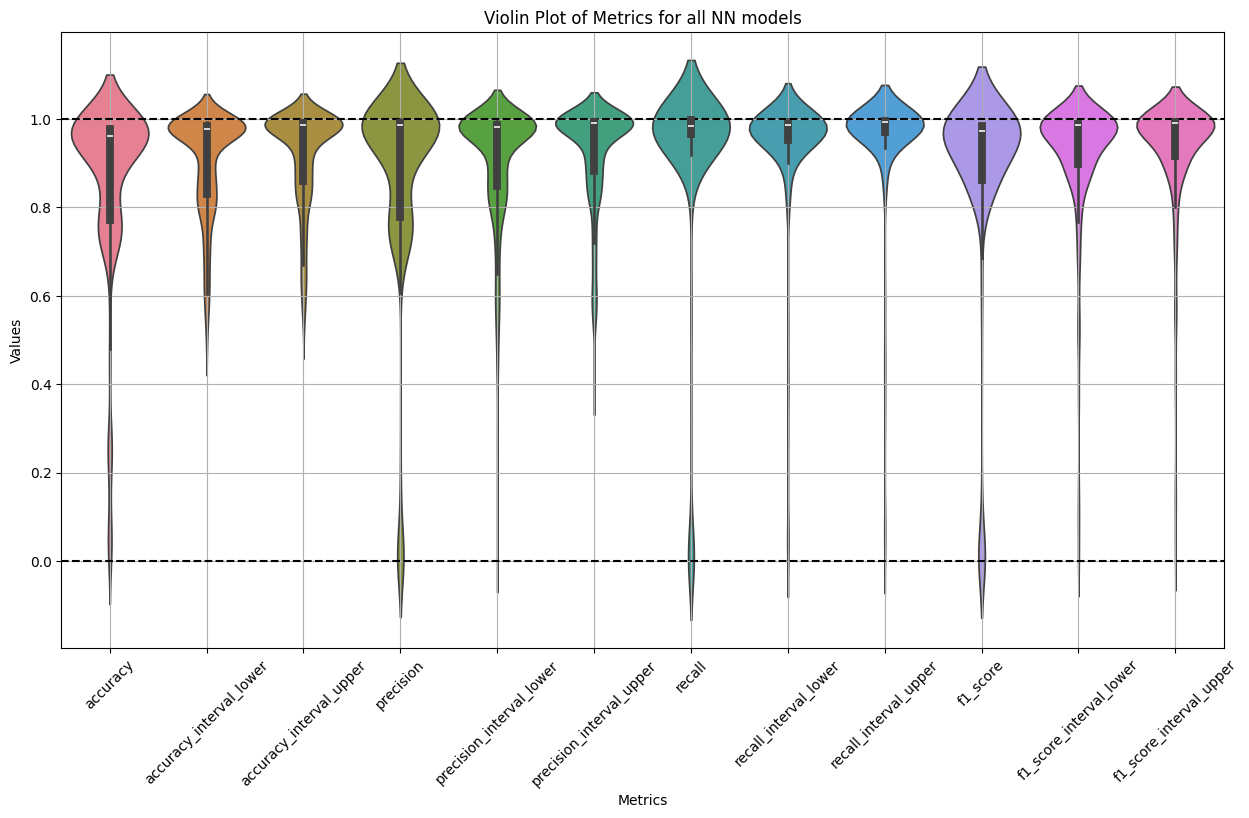

In [535]:
# Adding horizontal lines at 0.0 and 1.0
plt.figure(figsize=(15, 8))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=1.0, color='black', linestyle='--')

# Plotting the violin plot for all NN models
sns.violinplot(data=all_nn_df[all_nn_df.columns[2:]])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot of Metrics for all NN models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

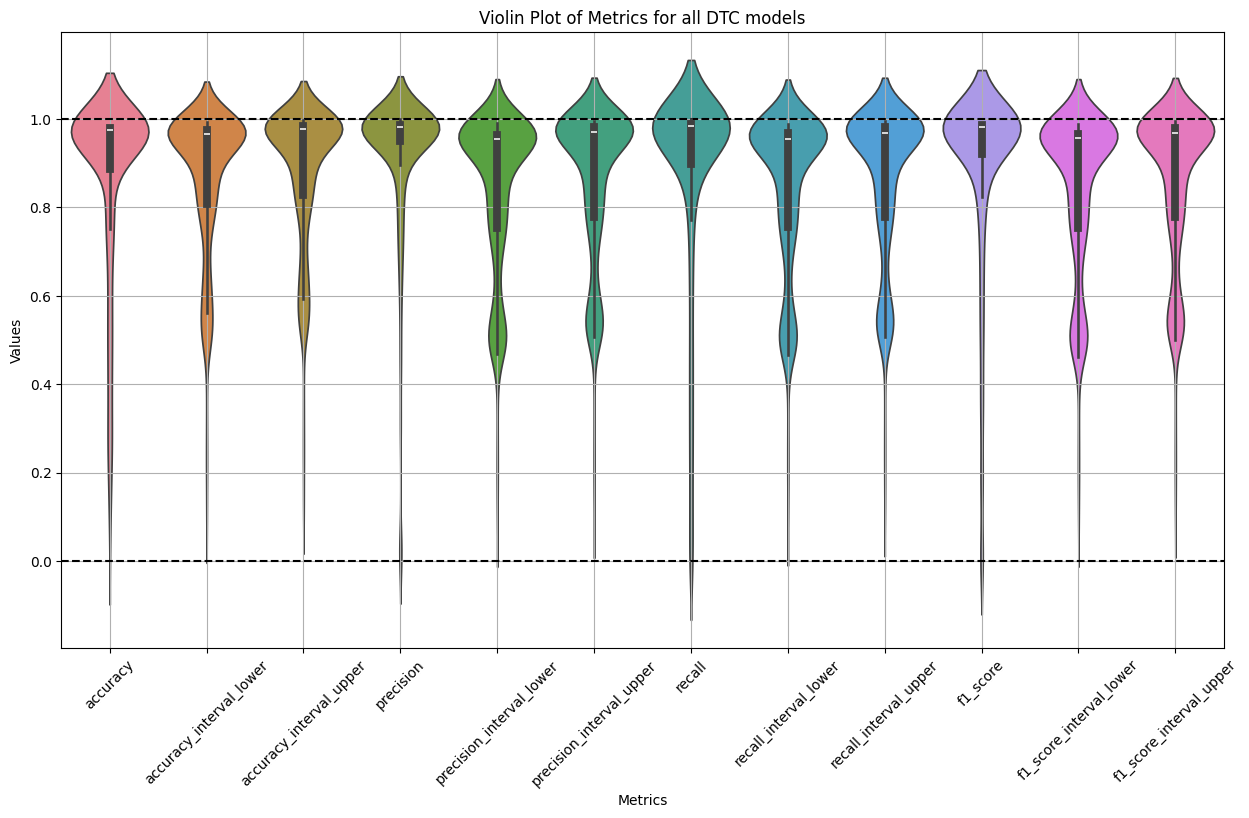

In [536]:
# Adding horizontal lines at 0.0 and 1.0
plt.figure(figsize=(15, 8))
plt.axhline(y=0.0, color='black', linestyle='--')
plt.axhline(y=1.0, color='black', linestyle='--')

# Plotting the violin plot for all DTC models
sns.violinplot(data=all_dtc_df[all_dtc_df.columns[2:]])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Violin Plot of Metrics for all DTC models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Accuracy for each Sub-DataFrame

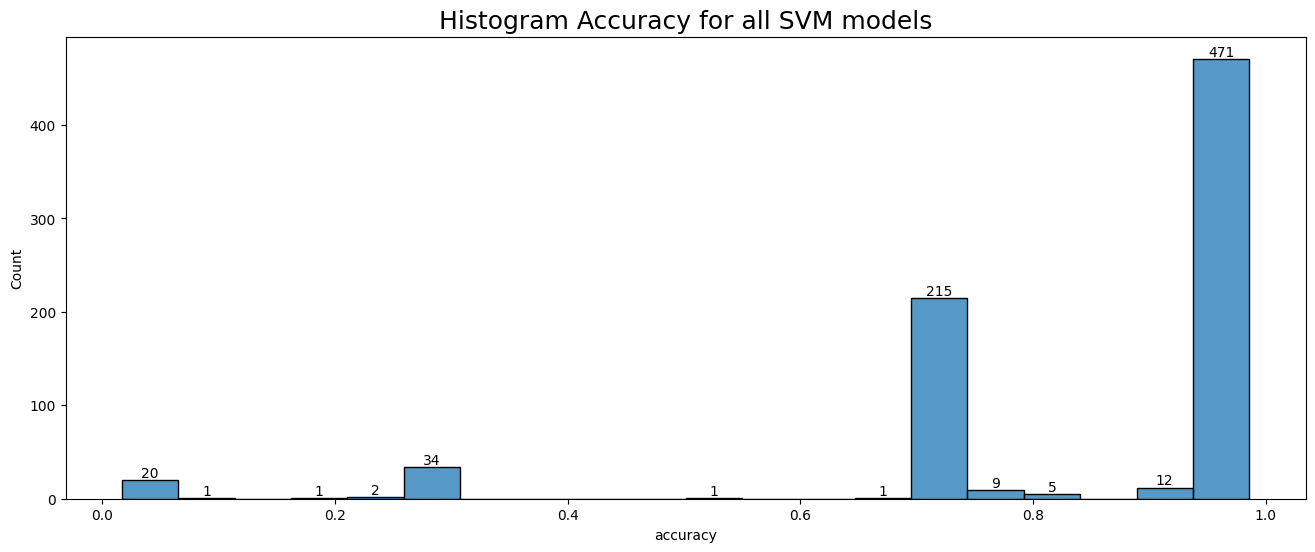

In [447]:
# Histogram Accuracy all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Accuracy for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['accuracy'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

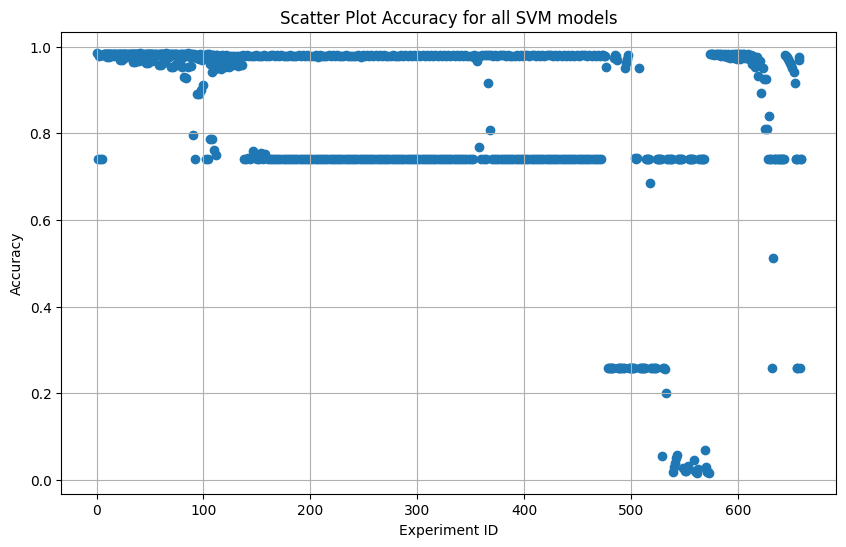

In [448]:
# Scatter plot for all SVM accuracies
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['accuracy'])

plt.xlabel('Experiment ID')
plt.ylabel('Accuracy')
plt.title('Scatter Plot Accuracy for all SVM models')
plt.grid(True)
plt.show()

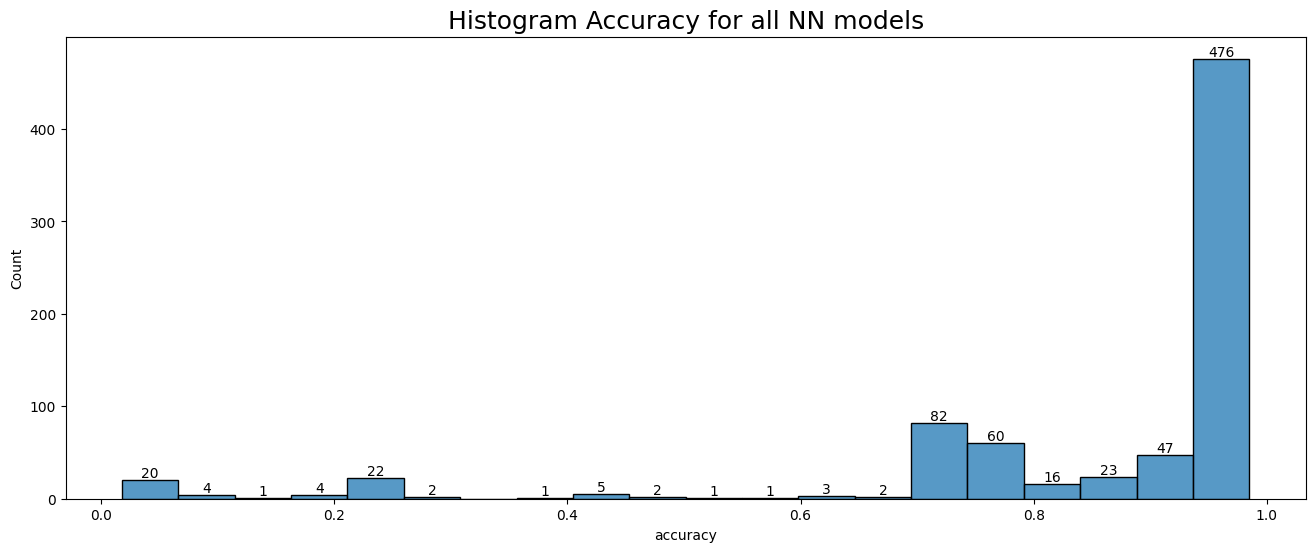

In [449]:
# Histogram Accuracy all NN models
plt.figure(figsize=(16, 6))
plt.title("Histogram Accuracy for all NN models", size=18)
ax = sns.histplot(x=all_nn_df['accuracy'], data=all_nn_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

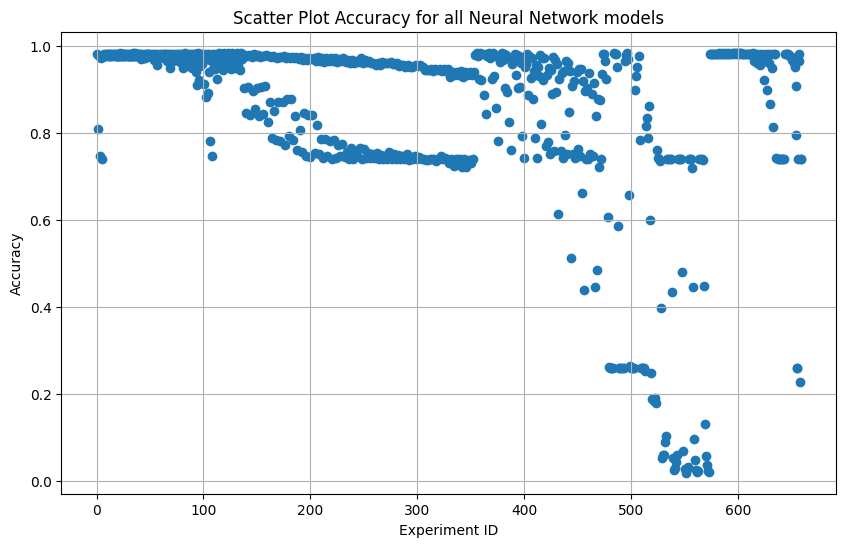

In [450]:
# Scatter plot for all NN accuracies
plt.figure(figsize=(10, 6))
plt.scatter(all_nn_df['experiment_id'], all_nn_df['accuracy'])

plt.xlabel('Experiment ID')
plt.ylabel('Accuracy')
plt.title('Scatter Plot Accuracy for all Neural Network models')
plt.grid(True)
plt.show()

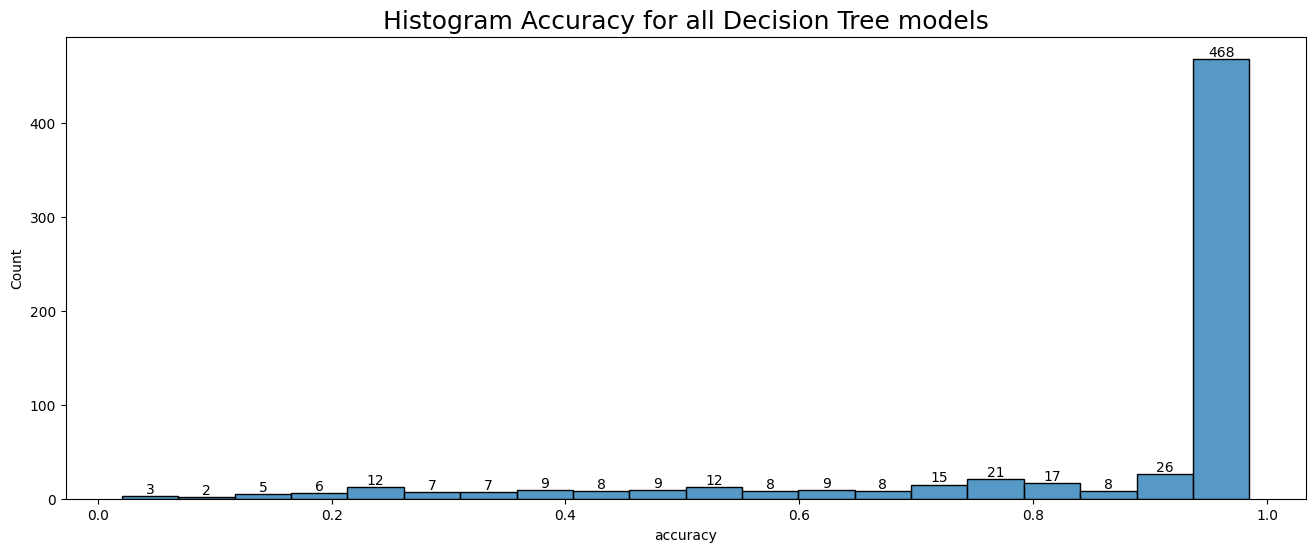

In [451]:
# Histogram Accuracy all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Accuracy for all Decision Tree models", size=18)
ax = sns.histplot(x=all_dtc_df['accuracy'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

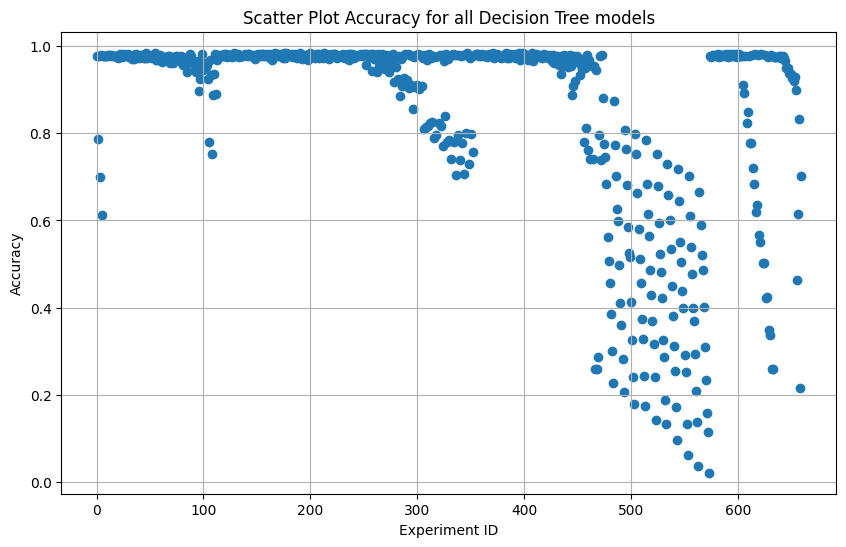

In [452]:
# Scatter plot for all DTC accuracies
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['accuracy'])

plt.xlabel('Experiment ID')
plt.ylabel('Accuracy')
plt.title('Scatter Plot Accuracy for all Decision Tree models')
plt.grid(True)
plt.show()

## Recall for each Sub-DataFrame

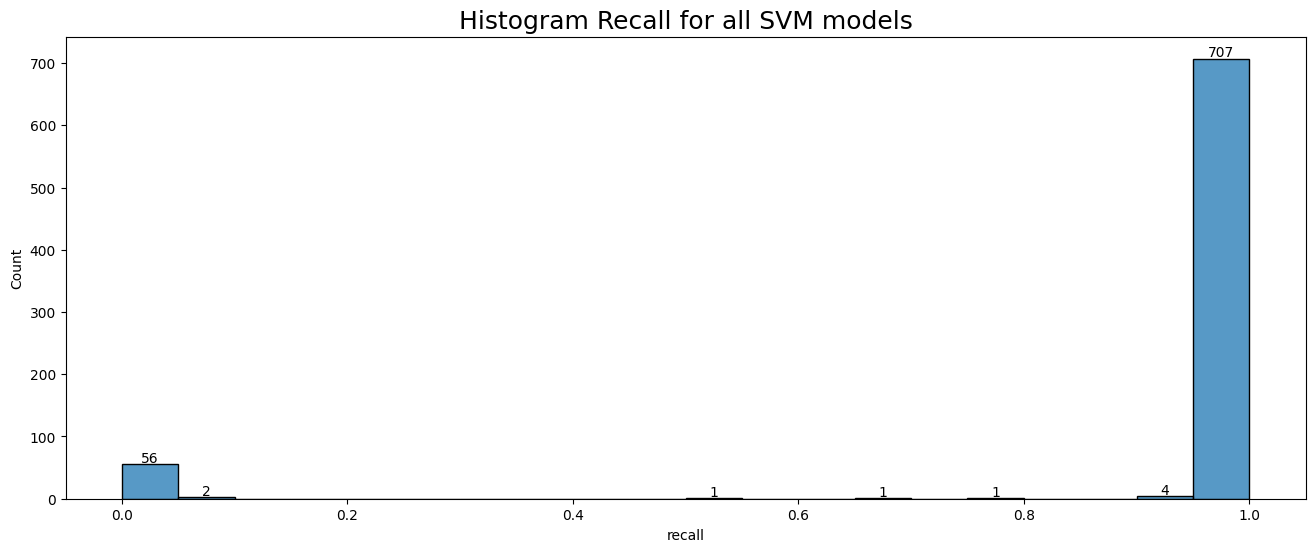

In [453]:
# Histogram recall all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Recall for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['recall'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

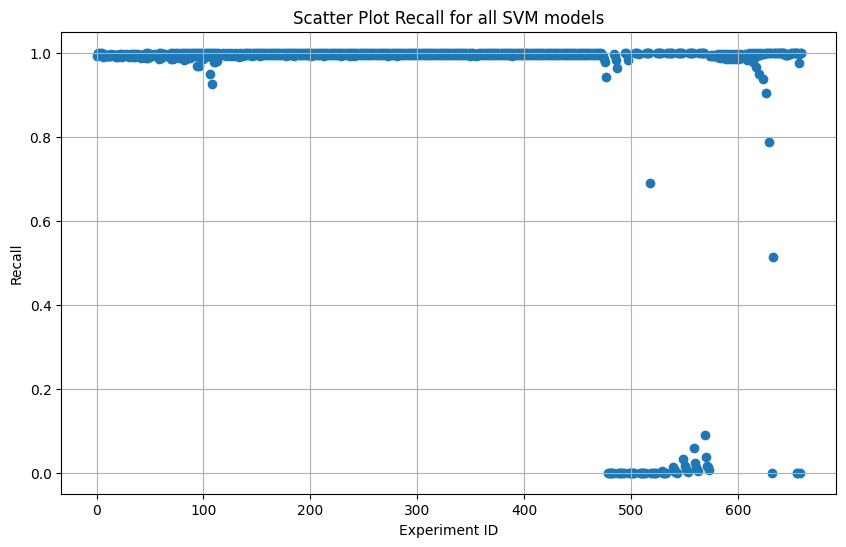

In [454]:
# Scatter plot for all SVM recall
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['recall'])

plt.xlabel('Experiment ID')
plt.ylabel('Recall')
plt.title('Scatter Plot Recall for all SVM models')
plt.grid(True)
plt.show()

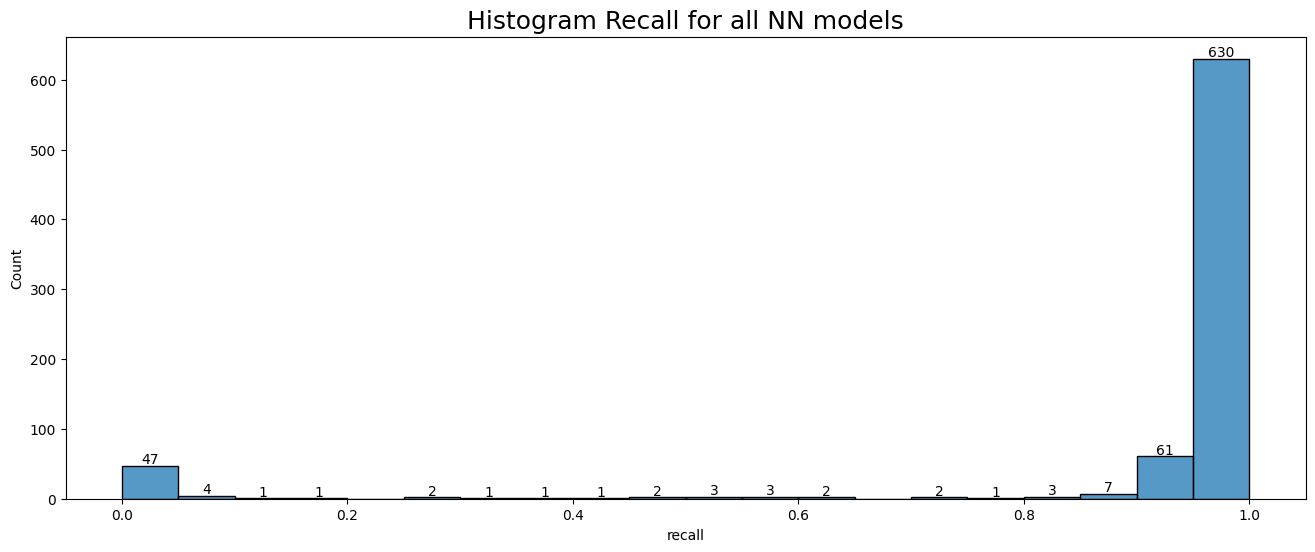

In [455]:
# Histogram recall all NN models
plt.figure(figsize=(16, 6))
plt.title("Histogram Recall for all NN models", size=18)
ax = sns.histplot(x=all_nn_df['recall'], data=all_nn_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

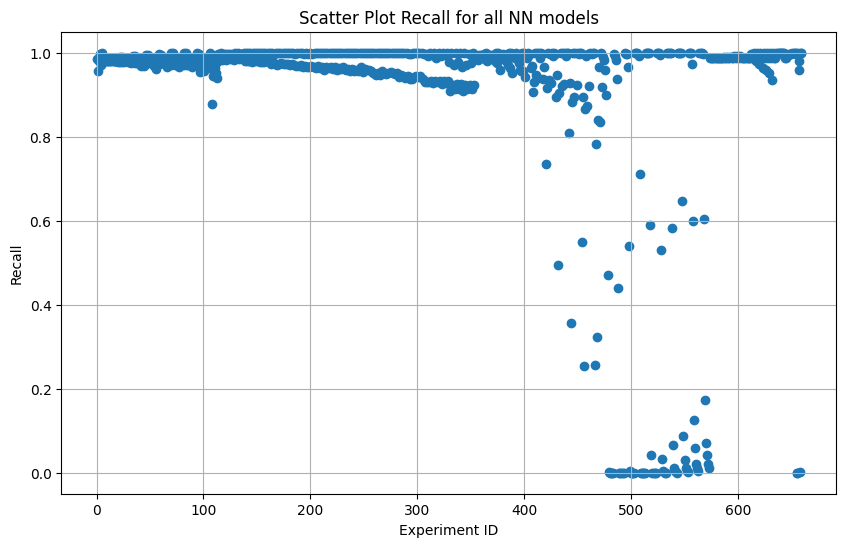

In [456]:
# Scatter plot for all NN recall
plt.figure(figsize=(10, 6))
plt.scatter(all_nn_df['experiment_id'], all_nn_df['recall'])

plt.xlabel('Experiment ID')
plt.ylabel('Recall')
plt.title('Scatter Plot Recall for all NN models')
plt.grid(True)
plt.show()

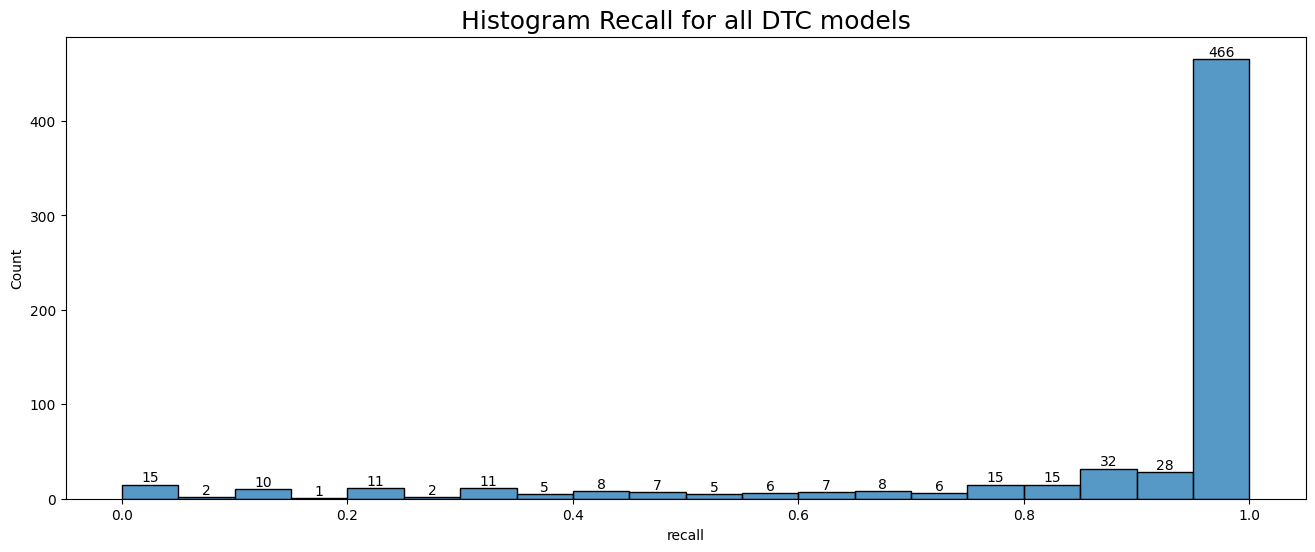

In [457]:
# Histogram recall all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Recall for all DTC models", size=18)
ax = sns.histplot(x=all_dtc_df['recall'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

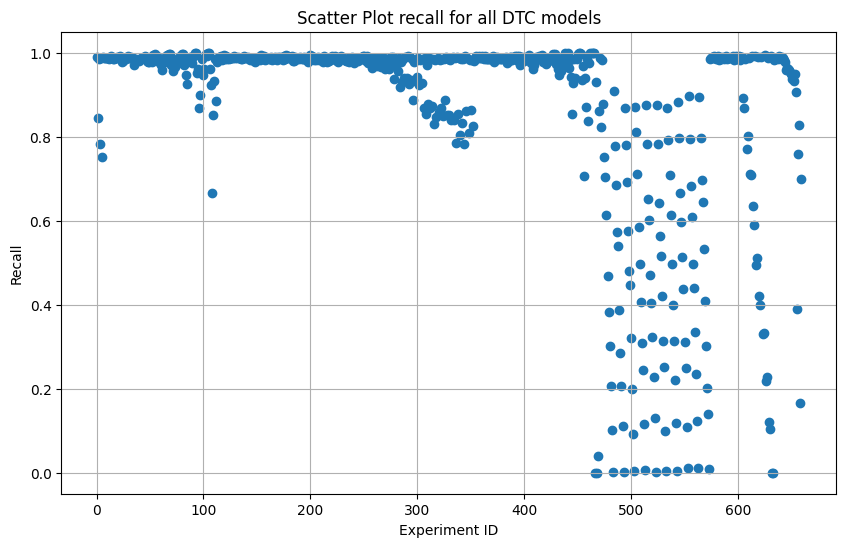

In [458]:
# Scatter plot for all DTC recall
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['recall'])

plt.xlabel('Experiment ID')
plt.ylabel('Recall')
plt.title('Scatter Plot recall for all DTC models')
plt.grid(True)
plt.show()

## F1 score for each Sub-DataFrame

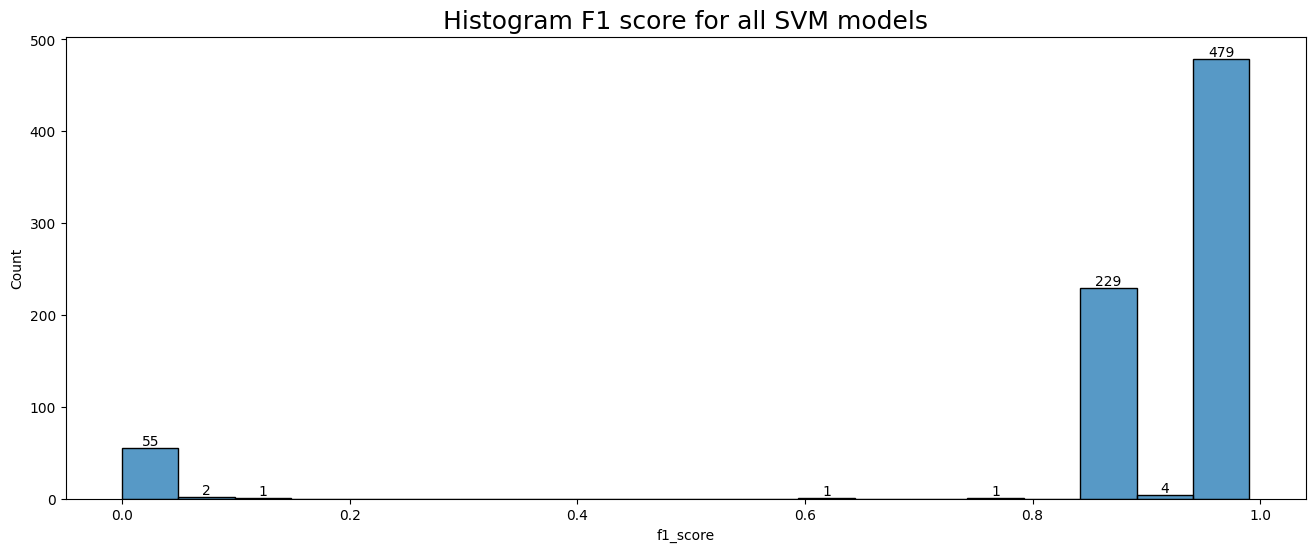

In [459]:
# Histogram F1 score all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram F1 score for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['f1_score'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

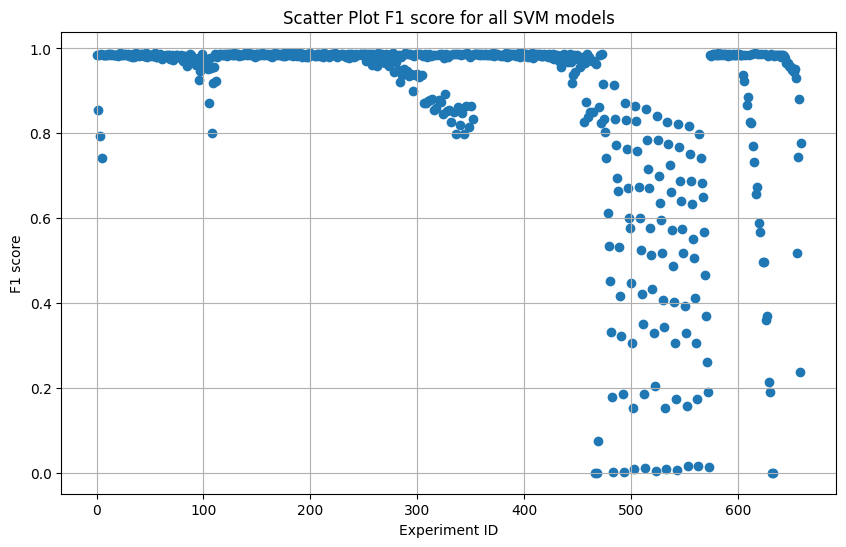

In [460]:
# Scatter plot for all DCT F1 score
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['f1_score'])

plt.xlabel('Experiment ID')
plt.ylabel('F1 score')
plt.title('Scatter Plot F1 score for all SVM models')
plt.grid(True)
plt.show()

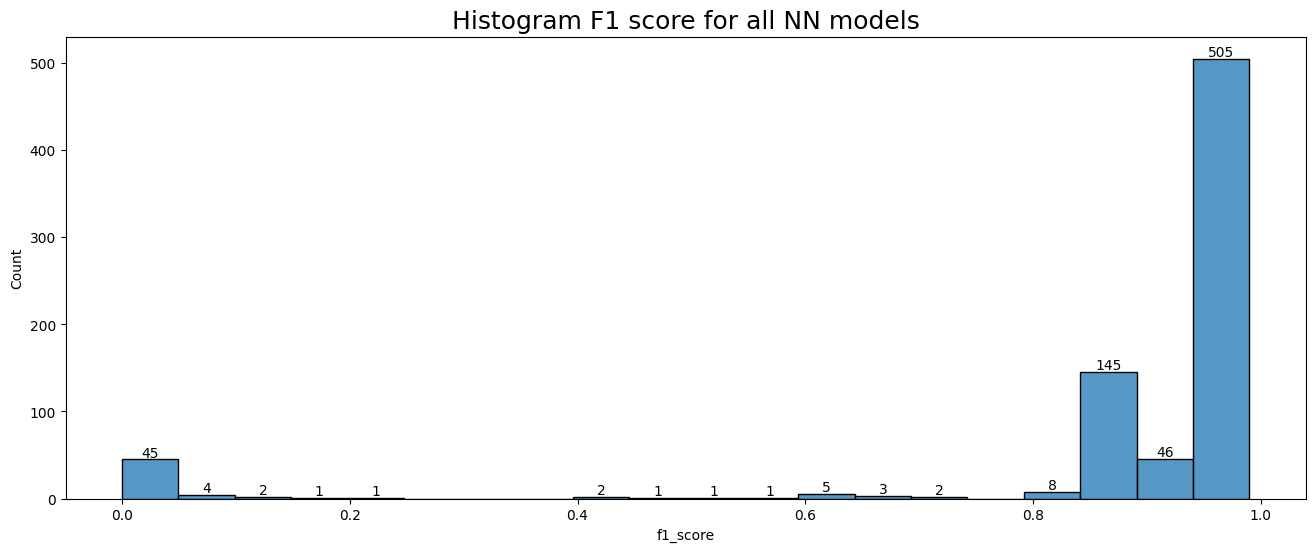

In [461]:
# Histogram F1 score all NN models
plt.figure(figsize=(16, 6))
plt.title("Histogram F1 score for all NN models", size=18)
ax = sns.histplot(x=all_nn_df['f1_score'], data=all_nn_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

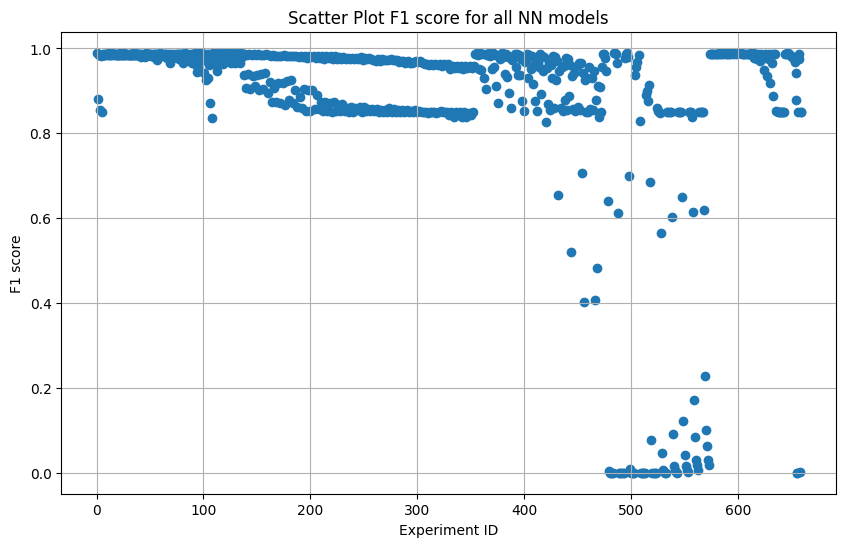

In [462]:
# Scatter plot for all NN F1 score
plt.figure(figsize=(10, 6))
plt.scatter(all_nn_df['experiment_id'], all_nn_df['f1_score'])

plt.xlabel('Experiment ID')
plt.ylabel('F1 score')
plt.title('Scatter Plot F1 score for all NN models')
plt.grid(True)
plt.show()

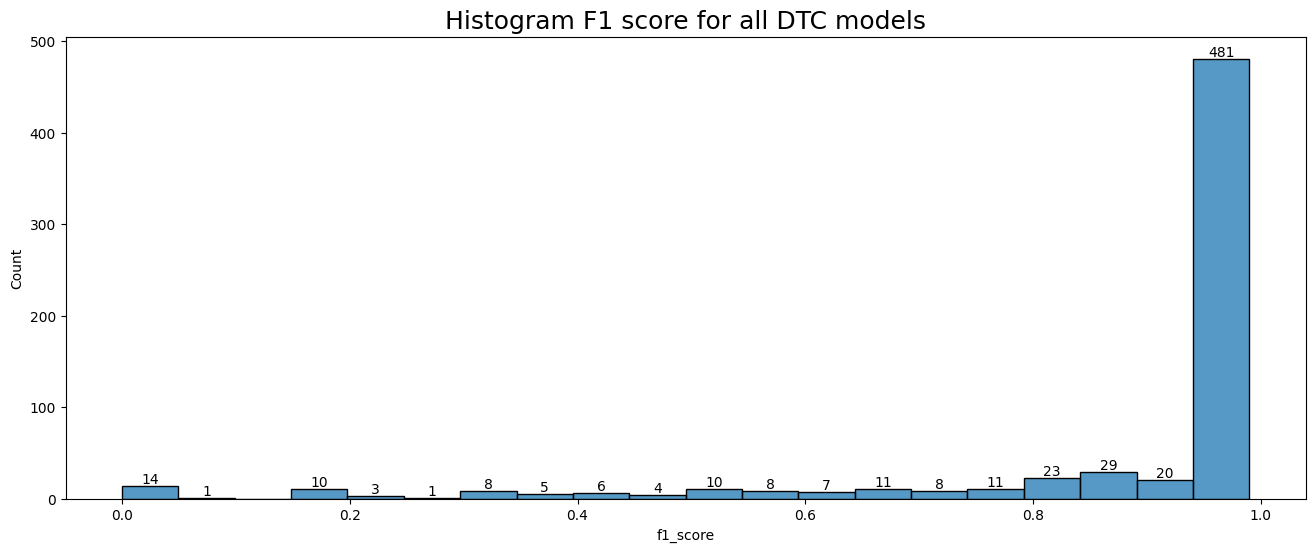

In [463]:
# Histogram F1 score all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram F1 score for all DTC models", size=18)
ax = sns.histplot(x=all_dtc_df['f1_score'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

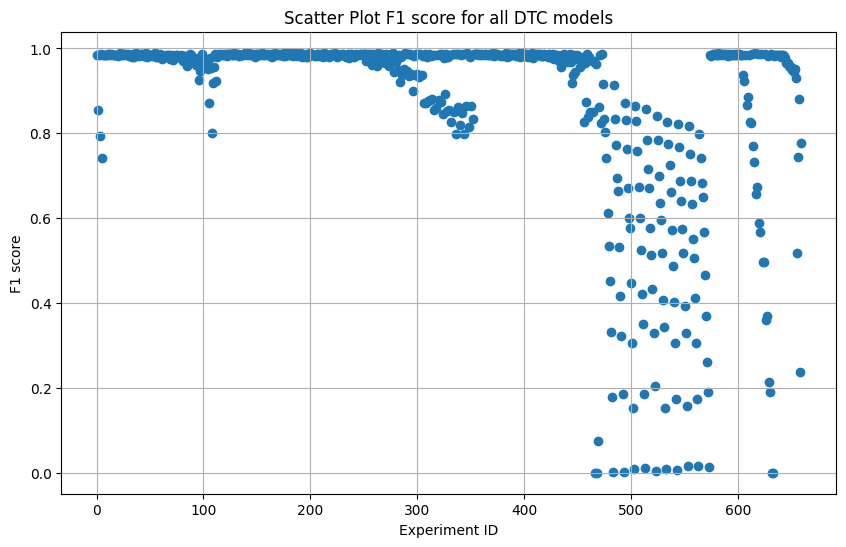

In [464]:
# Scatter plot for all DTC F1 score
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['f1_score'])

plt.xlabel('Experiment ID')
plt.ylabel('F1 score')
plt.title('Scatter Plot F1 score for all DTC models')
plt.grid(True)
plt.show()

## Precision for each Sub-DataFrame

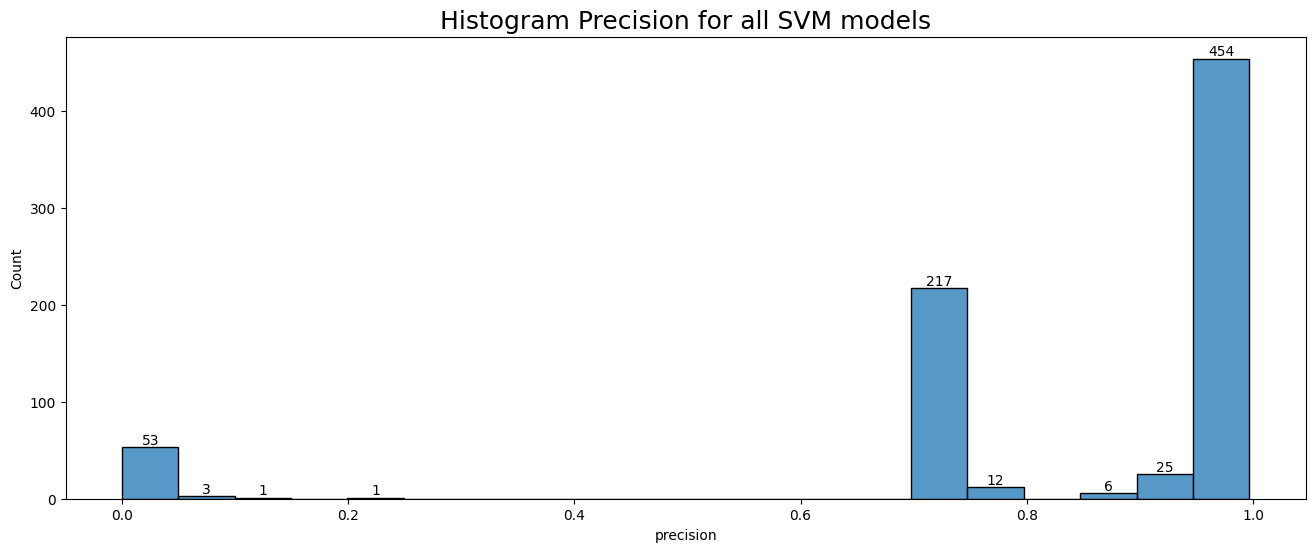

In [465]:
# Histogram Precision all SVM models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all SVM models", size=18)
ax = sns.histplot(x=all_svm_df['precision'], data=all_svm_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

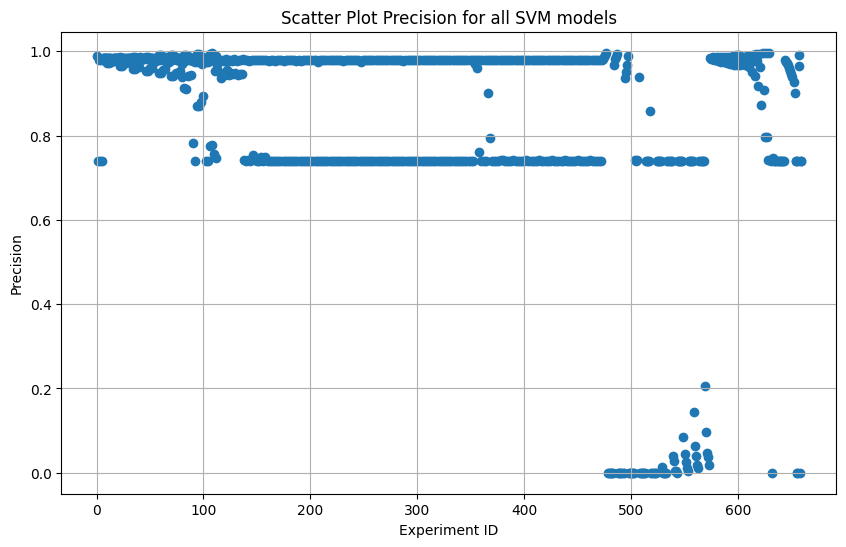

In [466]:
# Scatter plot for all SVM precisions
plt.figure(figsize=(10, 6))
plt.scatter(all_svm_df['experiment_id'], all_svm_df['precision'])

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all SVM models')
plt.grid(True)
plt.show()

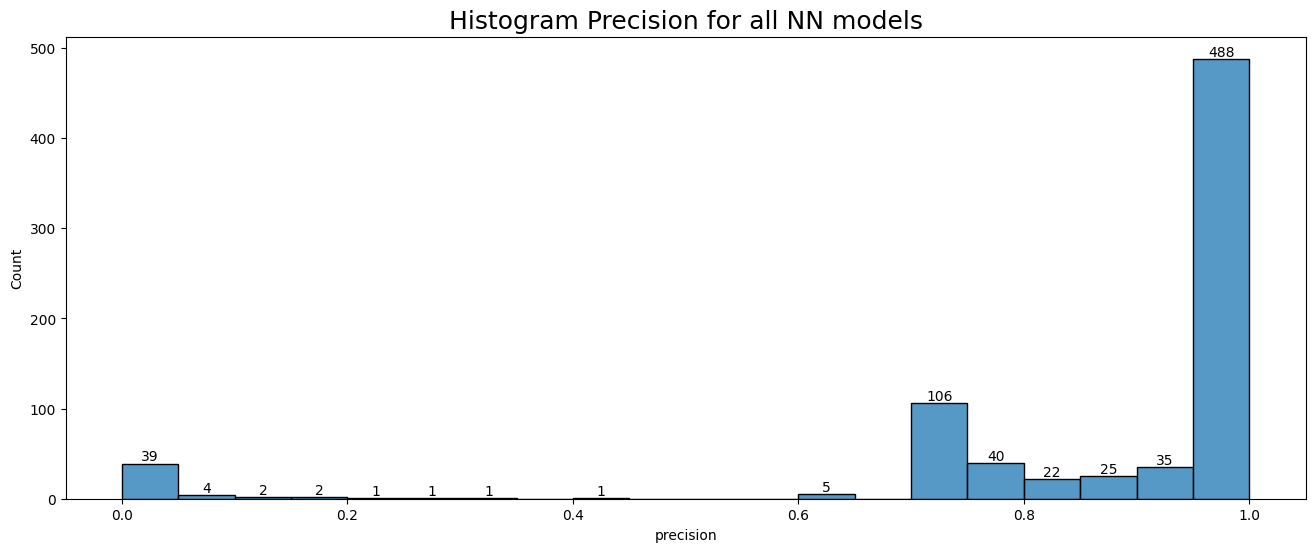

In [467]:
# Histogram Precision all NN models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all NN models", size=18)
ax = sns.histplot(x=all_nn_df['precision'], data=all_nn_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

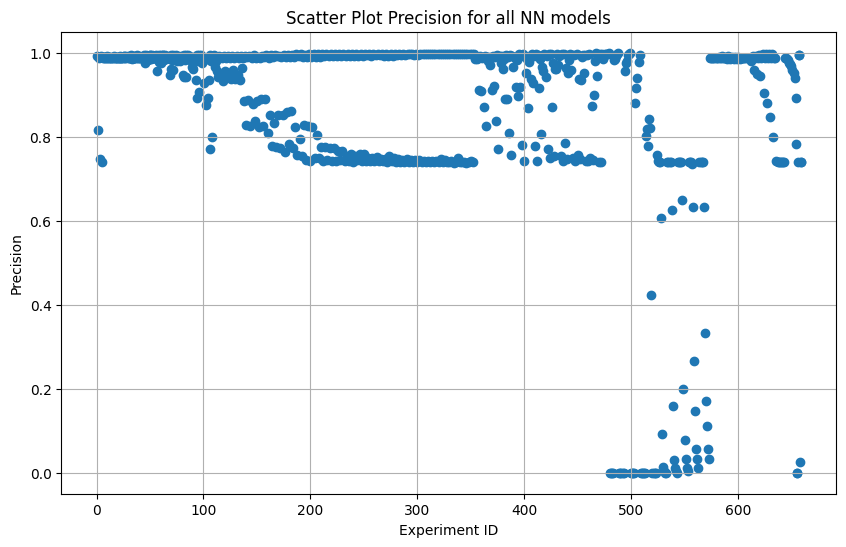

In [468]:
# Scatter plot for all NN precisions
plt.figure(figsize=(10, 6))
plt.scatter(all_nn_df['experiment_id'], all_nn_df['precision'])

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all NN models')
plt.grid(True)
plt.show()

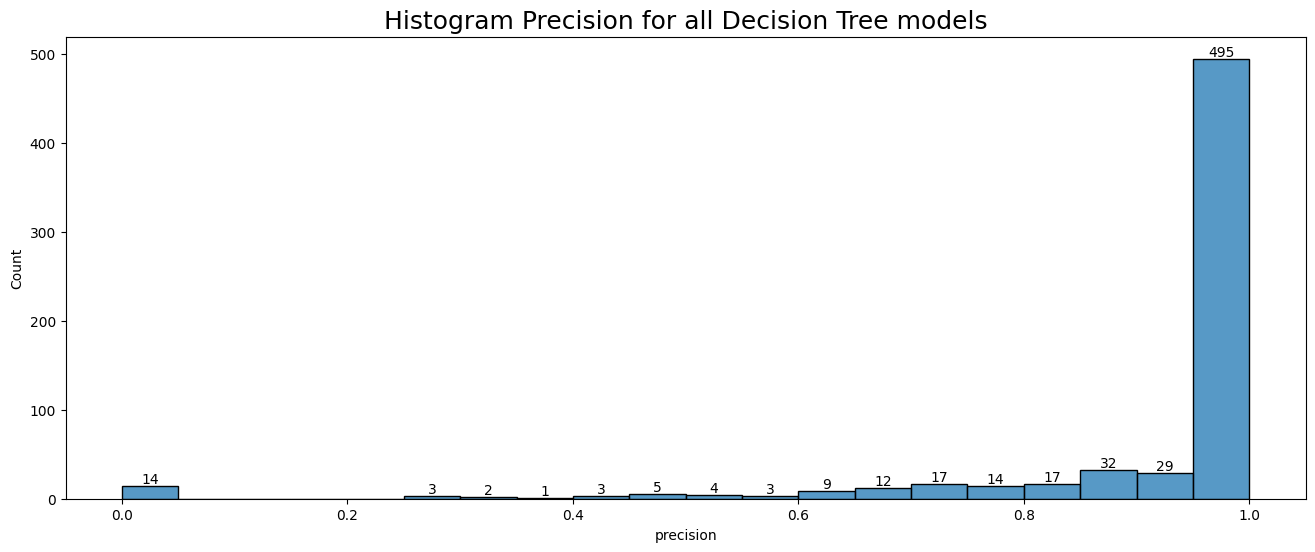

In [469]:
# Histogram Precision all DTC models
plt.figure(figsize=(16, 6))
plt.title("Histogram Precision for all Decision Tree models", size=18)
ax = sns.histplot(x=all_dtc_df['precision'], data=all_dtc_df, bins=20)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center")

plt.show()

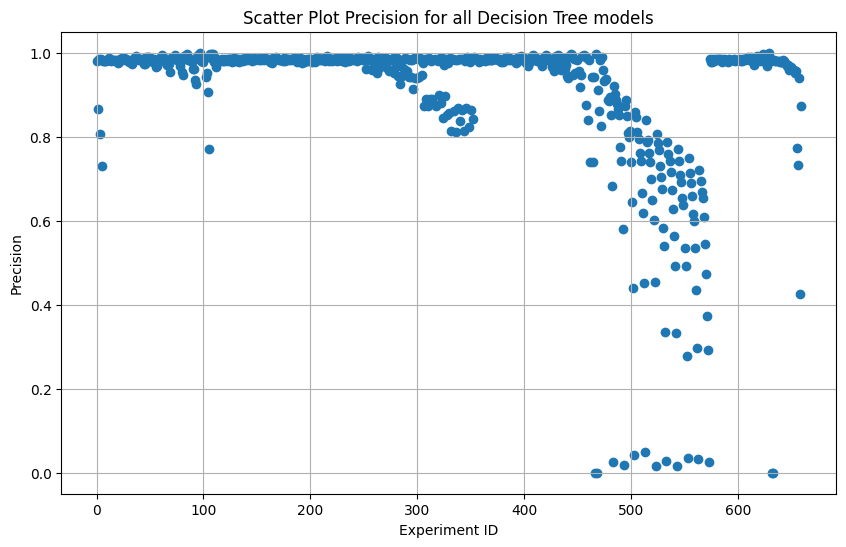

In [470]:
# Scatter plot for all DTC precisions
plt.figure(figsize=(10, 6))
plt.scatter(all_dtc_df['experiment_id'], all_dtc_df['precision'])

plt.xlabel('Experiment ID')
plt.ylabel('Precision')
plt.title('Scatter Plot Precision for all Decision Tree models')
plt.grid(True)
plt.show()

Idee future:

- Fare qualcosa su intervalli di confidenza
- Correlazioni modelli (es. SVM fa schifo quando fa schifo Rete?), se inutile lo togliamo
- Spider plot per gruppi, es. 3 spider plot fatti così:
   - 3 tipi SVM, usare mediana o media o qualcosa che riassume le metriche per ognuno
   - 3 tipi NN, usare mediana o media o qualcosa che riassume le metriche per ognuno
   - 1 tipo DTC
- Potremmo provare a mano a trovare i singoli esperimenti che producono i valori minimi per ogni modello ed analizzarli
- Fare grafici divisi per tipologia di esperimento (drop features, missing values, ... e anche combo)
- Eventuali altre idee

## Grafici per Tipo di Esperimento

### Experiment Parameters from JSON

In [471]:
import json

# Generic function for getting experiment parameters from json, given the experiment indexes
def get_experiment_parameters(file_path, start_index, end_index):
    try:
        # Read File
        with open(file_path, 'r') as file:
            experiment_data = json.load(file)      
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    results = []
    for index in range(start_index - 1, end_index):
        if index < len(experiment_data):
            experiment = experiment_data[index]
            results.append(experiment)
        else:
            print(f"Index {index + 1} is out of range")
    
    return results


### Missing Values

In [472]:
# Range for Missing Values Experiments
start_index = 6 
end_index = 113   
missing_values = get_experiment_parameters('../experiments_pipeline/experiments_config.json', start_index, end_index)
# Print the data to verify if it's correct
print(json.dumps(missing_values, indent=4))

[
    {
        "experiment-name": "experiment #6",
        "features-to-dirty-mv": [
            "PC1"
        ],
        "missing-values-percentage": 0.1,
        "wine-types-to-consider-missing-values": [
            "red"
        ]
    },
    {
        "experiment-name": "experiment #7",
        "features-to-dirty-mv": [
            "PC2"
        ],
        "missing-values-percentage": 0.1,
        "wine-types-to-consider-missing-values": [
            "red"
        ]
    },
    {
        "experiment-name": "experiment #8",
        "features-to-dirty-mv": [
            "PC1",
            "PC2"
        ],
        "missing-values-percentage": 0.1,
        "wine-types-to-consider-missing-values": [
            "red"
        ]
    },
    {
        "experiment-name": "experiment #9",
        "features-to-dirty-mv": [
            "PC3",
            "PC4",
            "PC5"
        ],
        "missing-values-percentage": 0.1,
        "wine-types-to-consider-missing-values": [
            

In [498]:
def get_results_mv(features_to_consider, wine_types_to_consider_missing_values):
    # Get the filtered data, needed for the plots
    results = [(int(experiment["experiment-name"][12:]), experiment["missing-values-percentage"], experiment["wine-types-to-consider-missing-values"]) 
    for experiment in missing_values 
    if experiment["features-to-dirty-mv"] == features_to_consider and experiment["wine-types-to-consider-missing-values"] == wine_types_to_consider_missing_values]

    # Insert in the first position the "fake" experiment, used for the ML pipeline metrics
    results.insert(0, (0, 0.0, results[1][2]))

    # Print the data to verify if it's correct
    #for result in results:
        #print("Experiment ID:", result[0])
        #print("Missing Values Percentage:", result[1])
        #print("Target:", result[2])

    return results

In [499]:
# Define metrics and colors
metrics = {
    'accuracy': 'purple',
    'f1_score': 'red',
    'precision': 'blue',
    'recall': 'green'
}

# Function to plot
def plot_missing_values_graph(model_name_to_consider, features_to_consider, wine_types_to_consider_missing_values):
    # Get the results object
    results = get_results_mv(features_to_consider, wine_types_to_consider_missing_values)

    # Make the graph
    plt.figure(figsize=(10, 6))

    # Flag model_name ends with (mean) or (EM)
    flag = model_name_to_consider.endswith('(mean)') or model_name_to_consider.endswith('(EM)')

    for metric, color in metrics.items():
        # Initialize lists to collect x and y values
        x_values = []
        y_values = []

        for experiment_id, missing_values_percentage, _ in results:
            # Select the correct experiment in the df of metrics
            data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider)]

            if data.empty:
                # Experiment 0 and (mean) or (EM) in model_name
                assert experiment_id == 0 and flag, "Something went wrong, expected experiment 0 and model_name which ends with (mean) or (EM)"
                
                if model_name_to_consider.endswith('(mean)'):
                    # Remove (mean) from the parameter
                    model_name_to_consider_fixed = model_name_to_consider[:-7]
                else:
                    # Remove (EM) from the parameter
                    model_name_to_consider_fixed = model_name_to_consider[:-5]

                # Get the data properly
                data = df[(df['experiment_id'] == experiment_id) & (df['model_name'] == model_name_to_consider_fixed)]

                if data.empty:
                    assert False, "This was unexpected"

            # Get the metrics
            metric_value = data[metric].values[0]
            # Collect the data points
            x_values.append(missing_values_percentage * 100)
            y_values.append(metric_value)
        
        # Plot all collected points and lines for the current metric
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{metric.upper()} ({model_name_to_consider})")
        
    plt.xlabel('Missing Values (%)')
    plt.ylabel('Metrics Values')
    plt.title(f'Performance Metrics {model_name_to_consider} for Component(s) {features_to_consider} and Target(s) {wine_types_to_consider_missing_values}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([10 * i for i in range(0, 10)])
    plt.show()

In [501]:
# Features to consider
features_to_consider_list = [["PC1"], ["PC2"], ["PC1", "PC2"], ["PC3", "PC4", "PC5"]]

# Types to consider
wine_types_to_consider_list = [["red"], ["white"], ["red", "white"]]

#### SVM

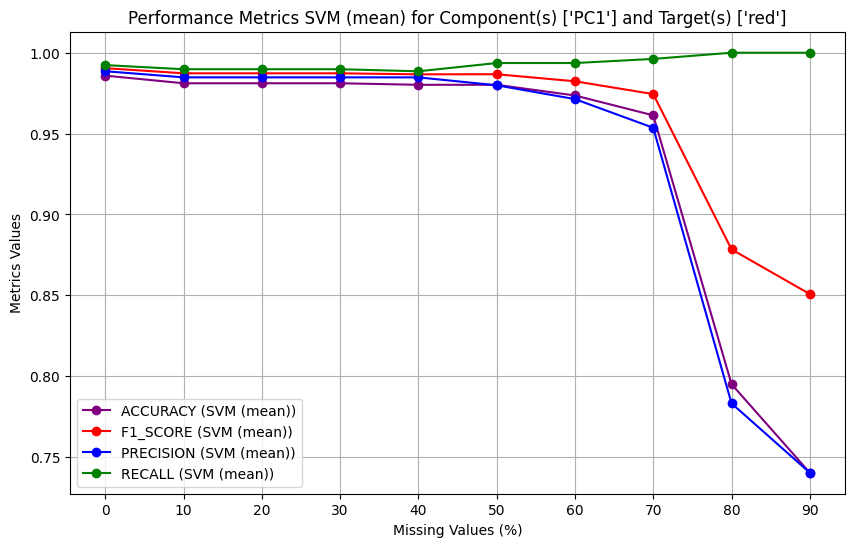

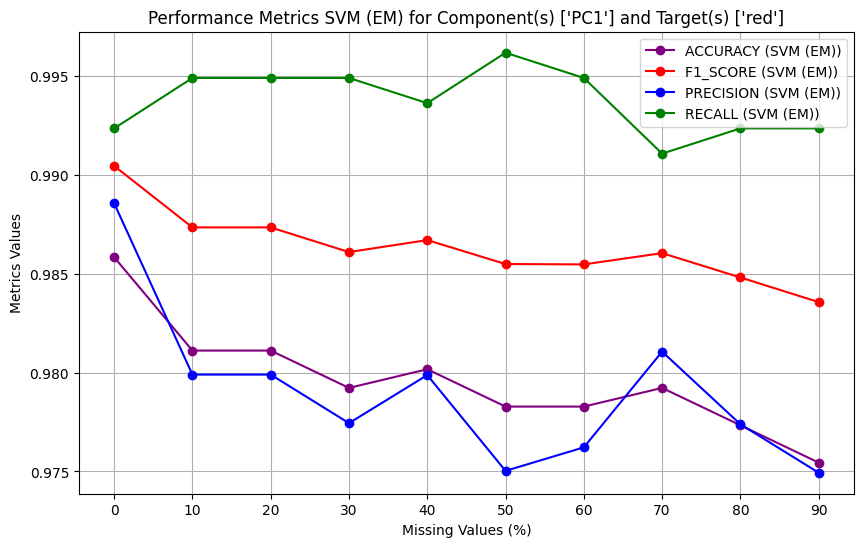

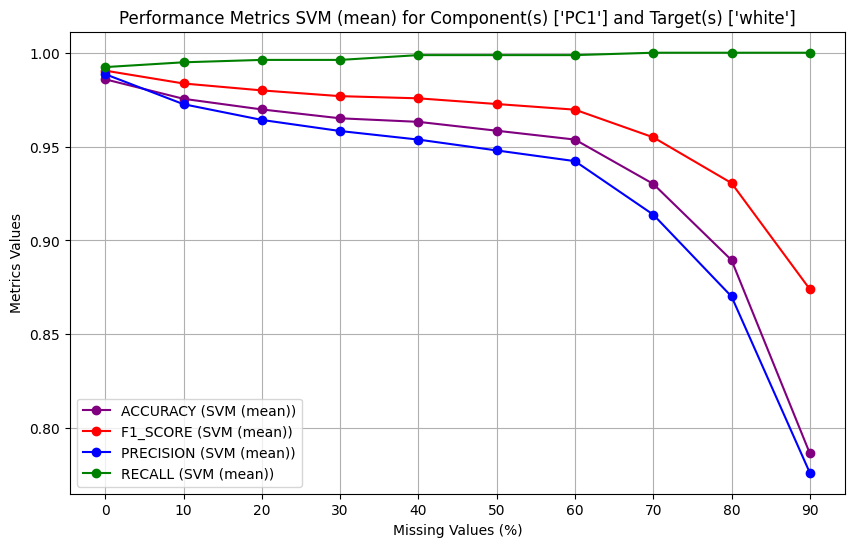

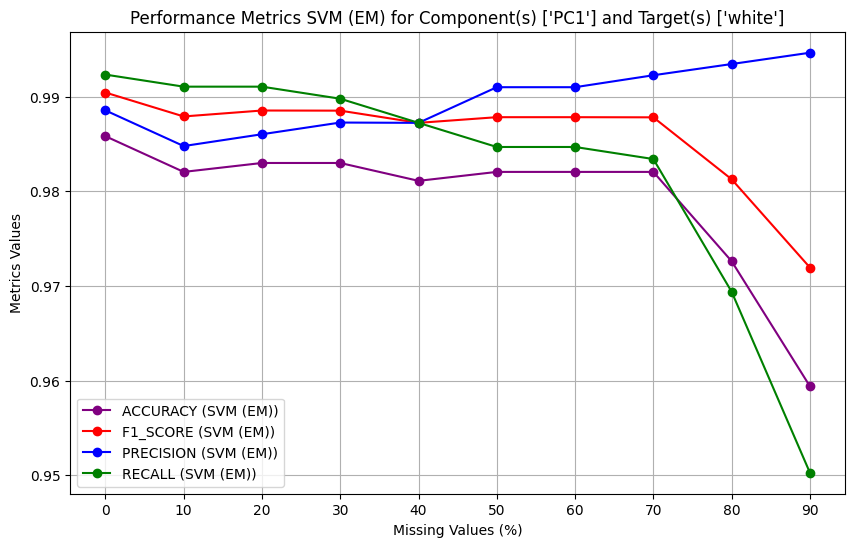

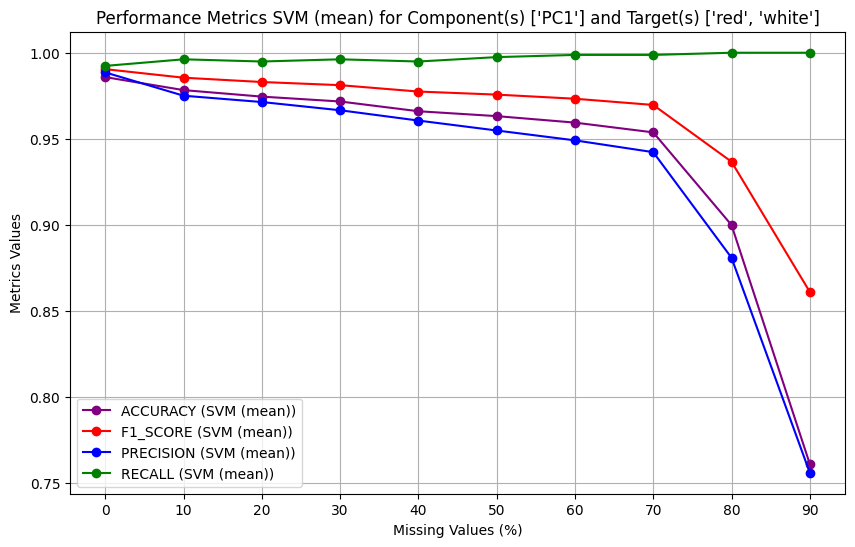

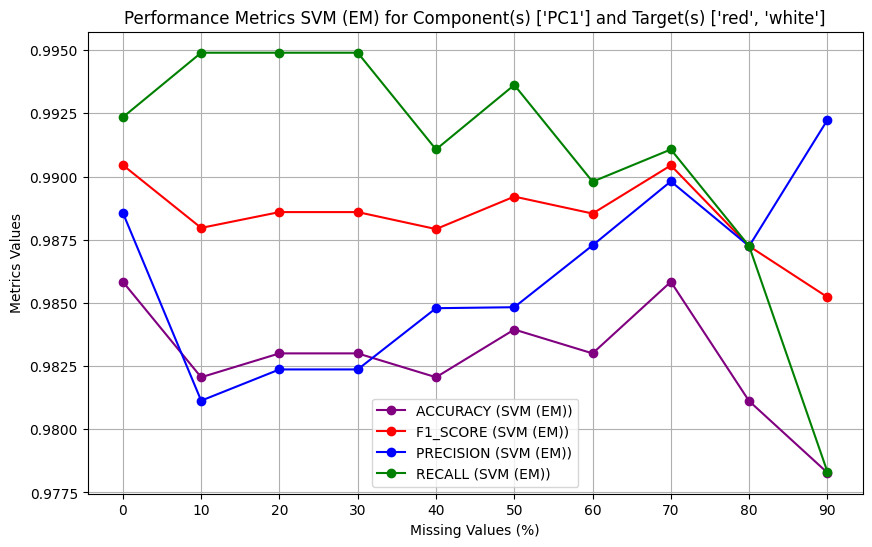

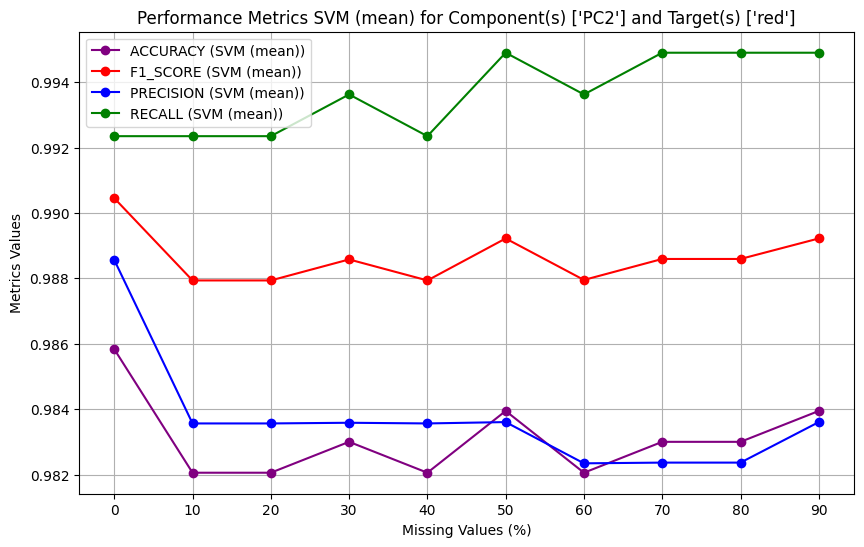

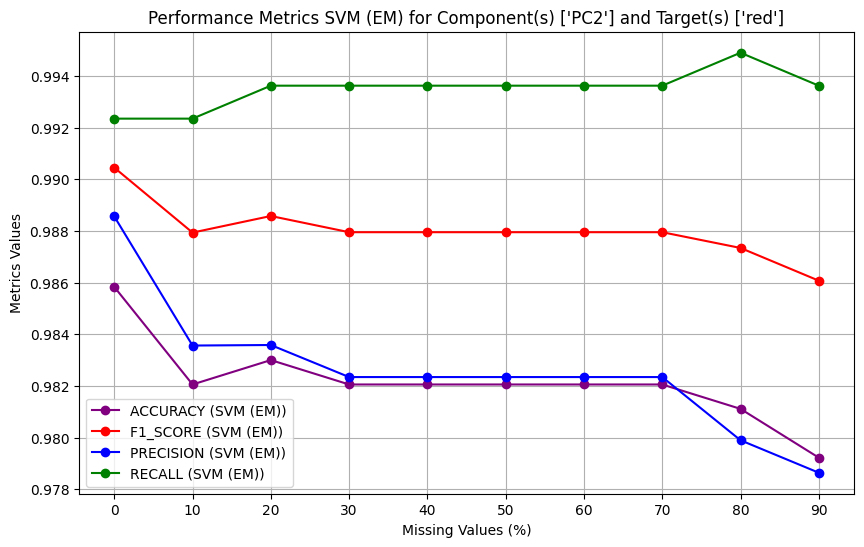

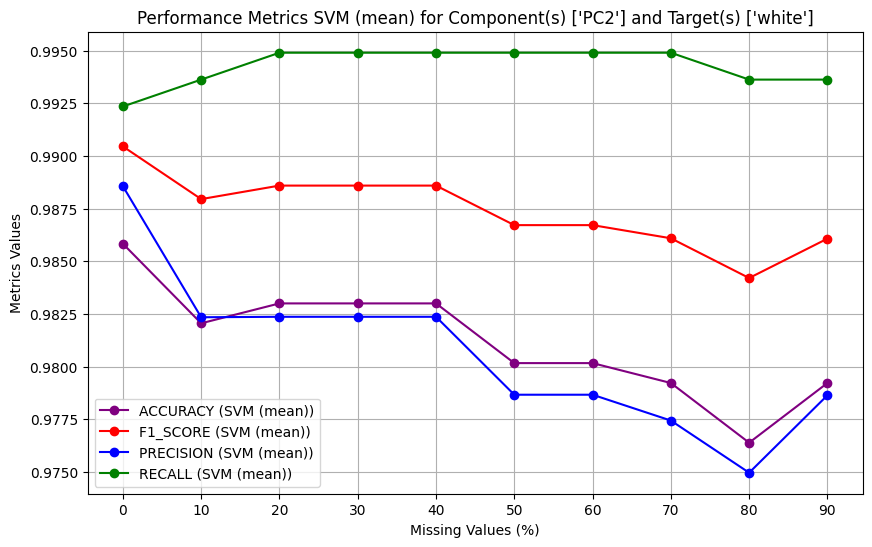

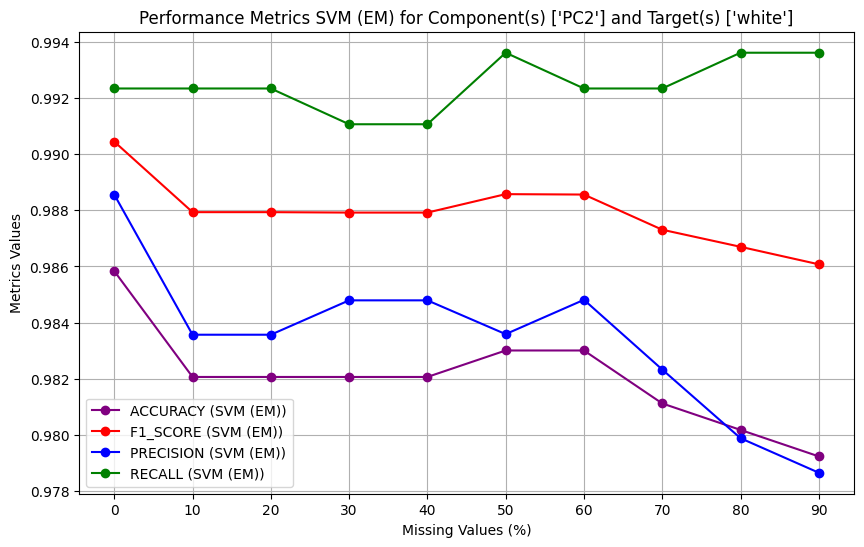

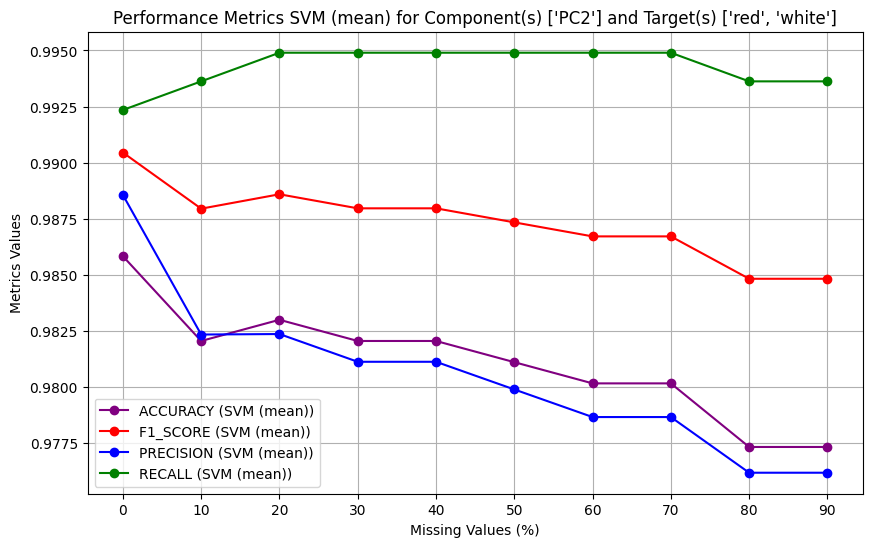

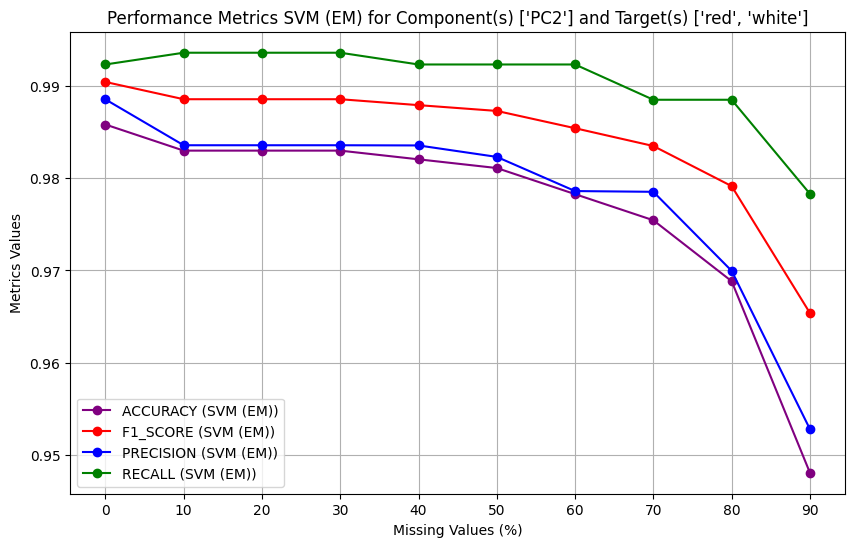

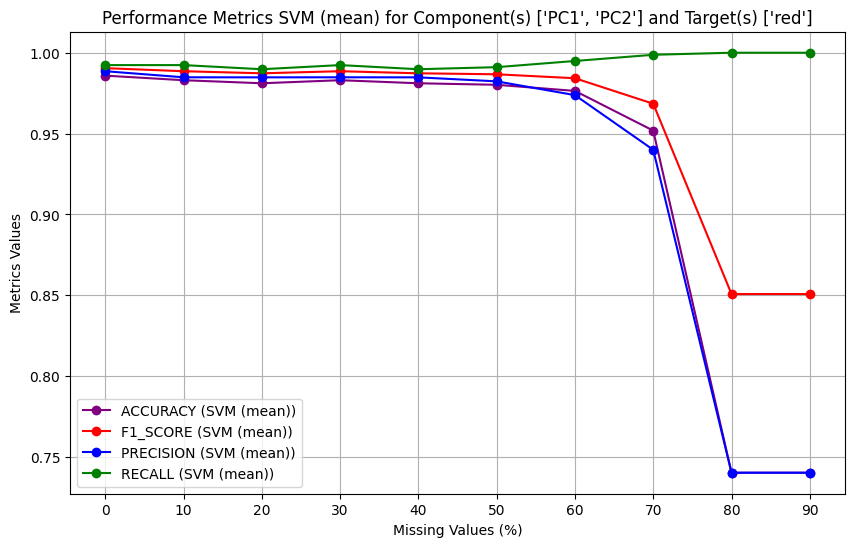

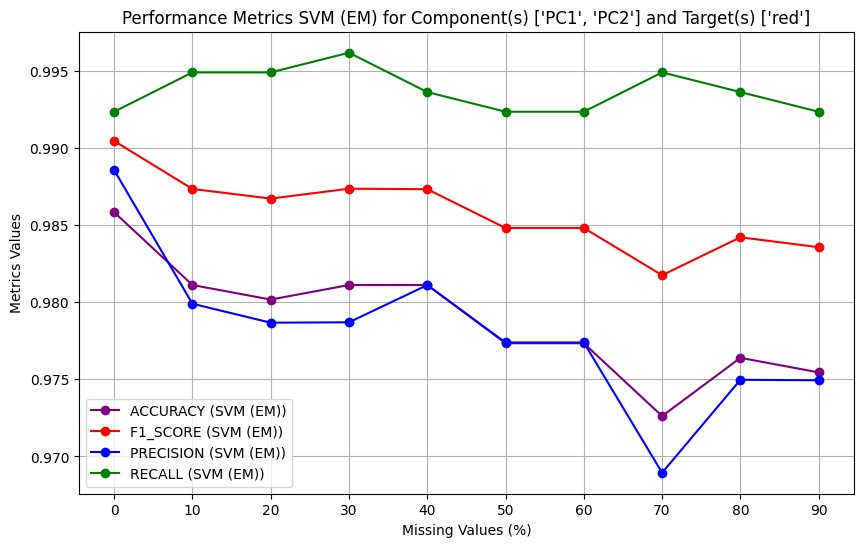

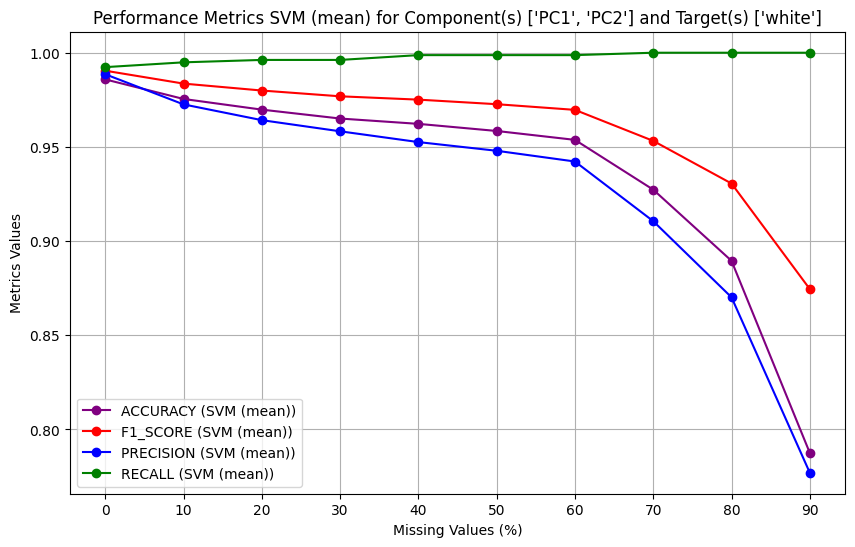

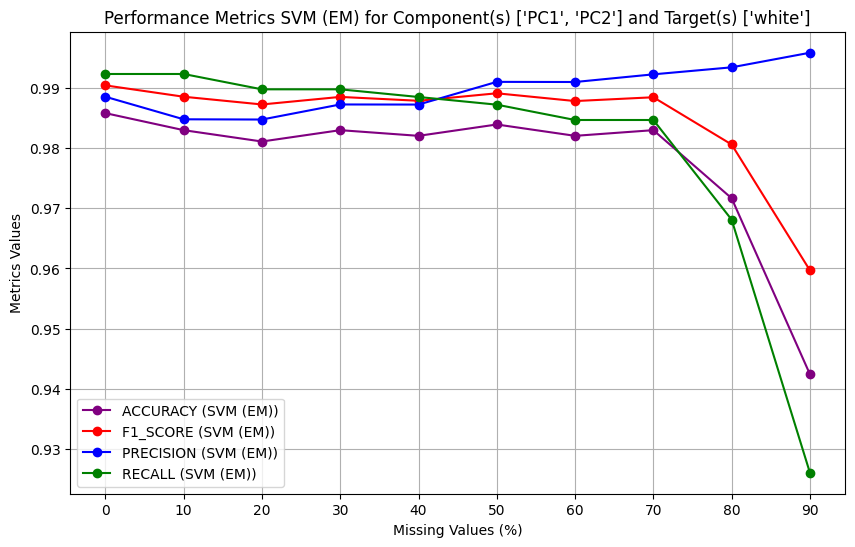

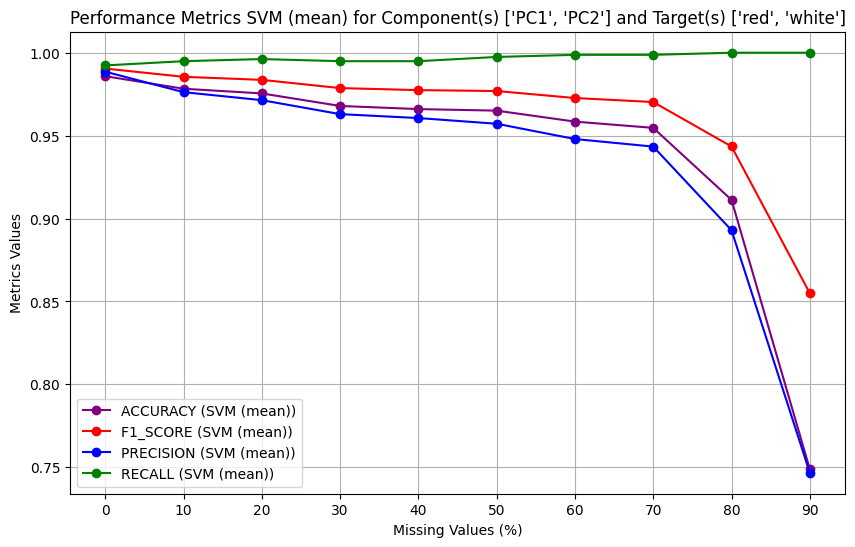

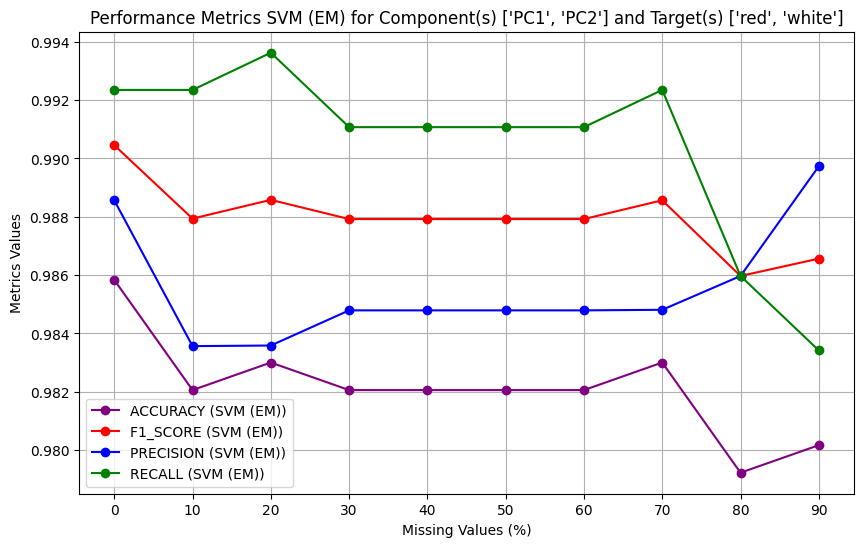

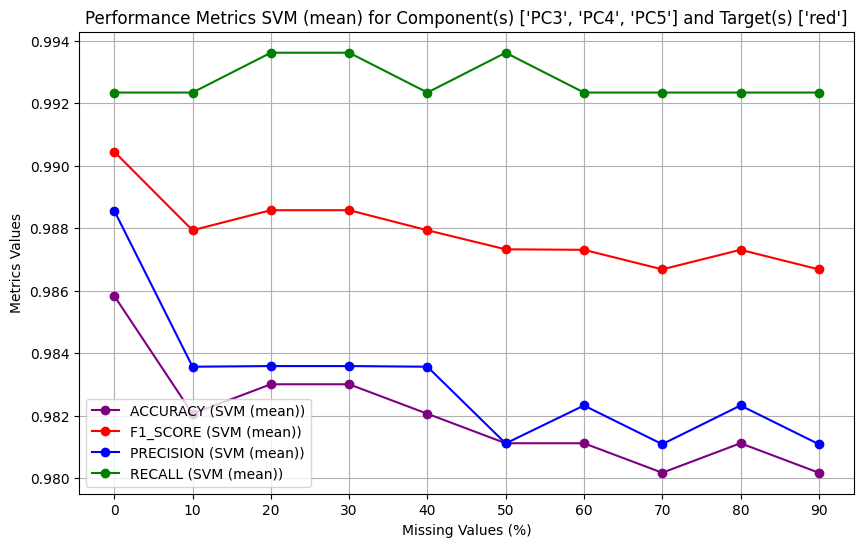

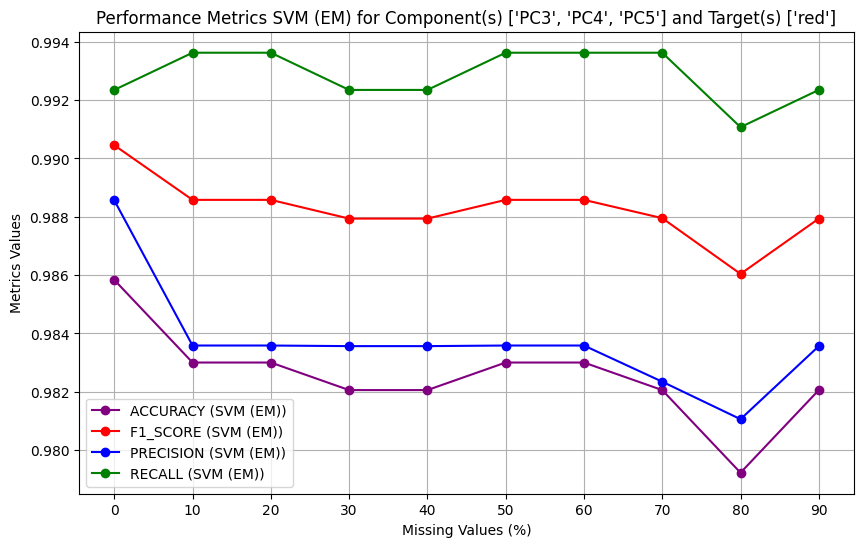

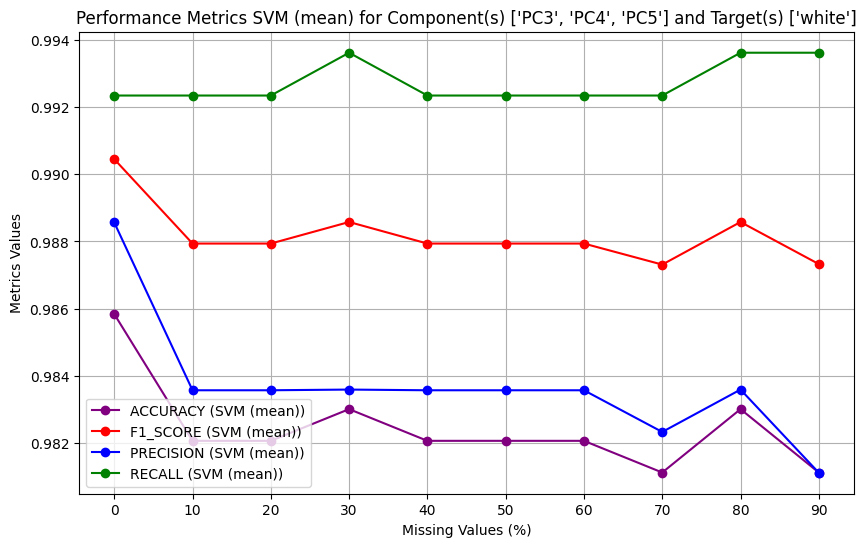

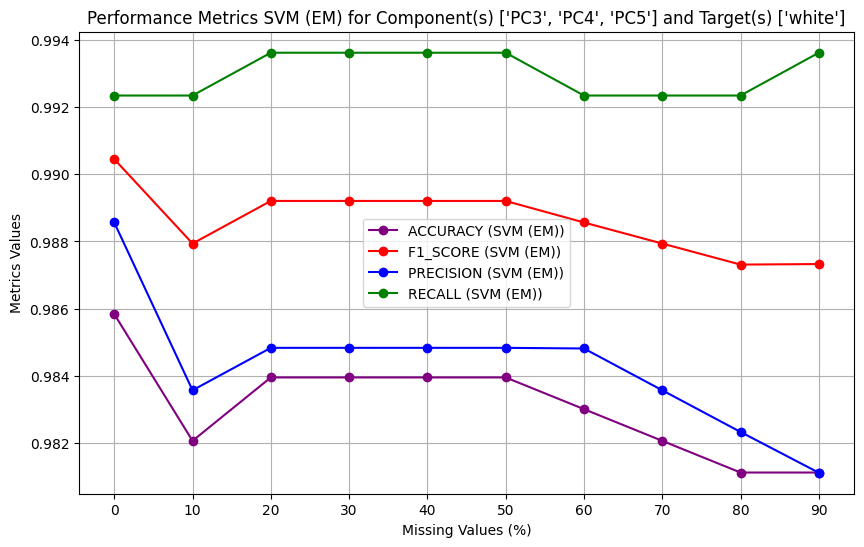

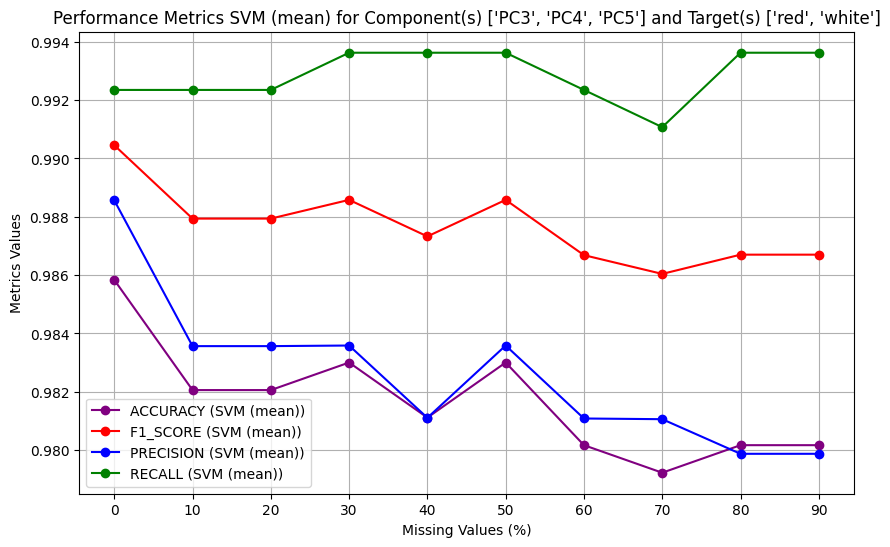

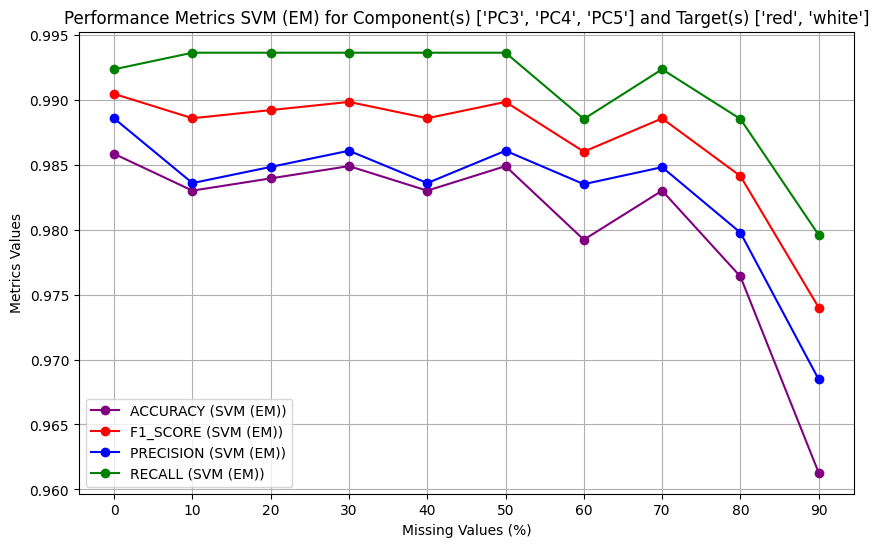

In [502]:
# Plot everything about SVM
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        for svm_type in ["SVM (mean)", "SVM (EM)"]:
            plot_missing_values_graph(svm_type, feature, wine_types)

#### Neural Network

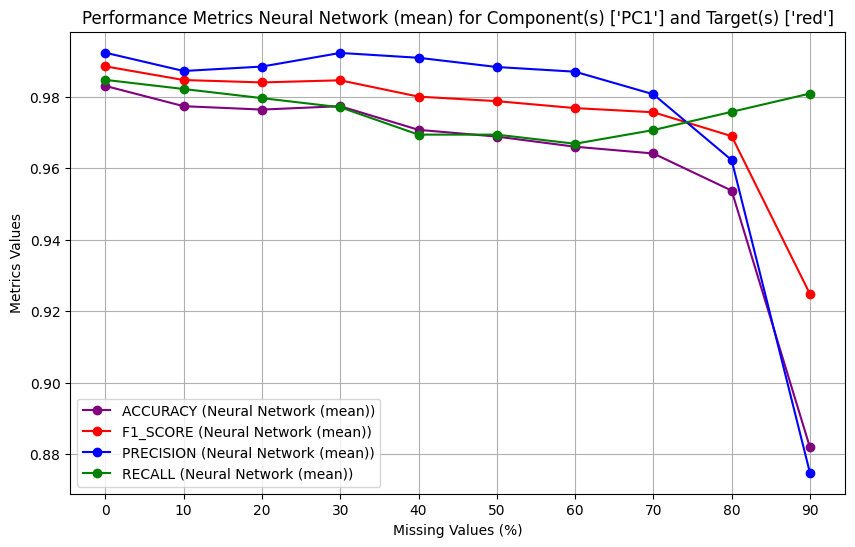

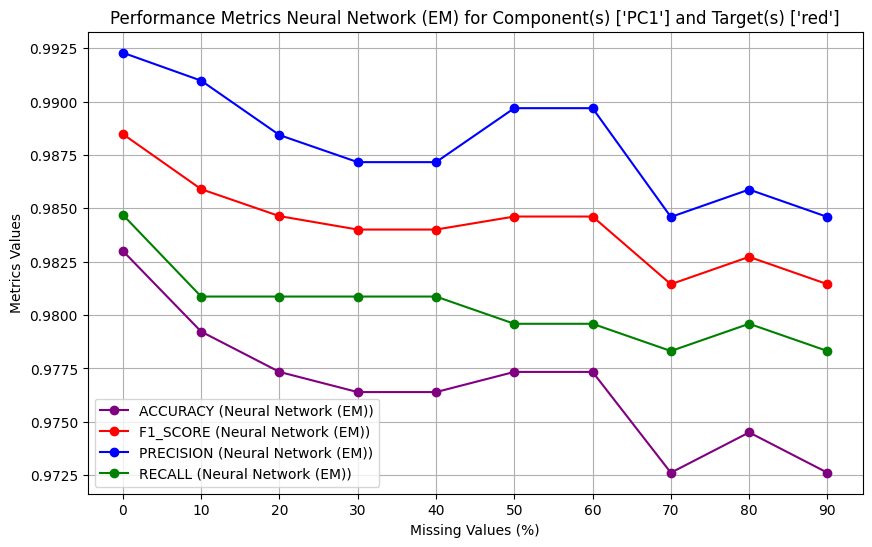

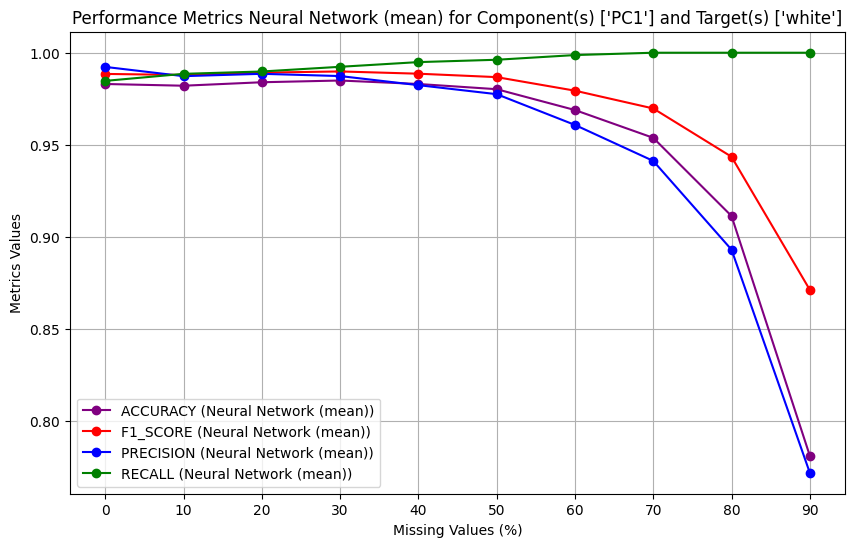

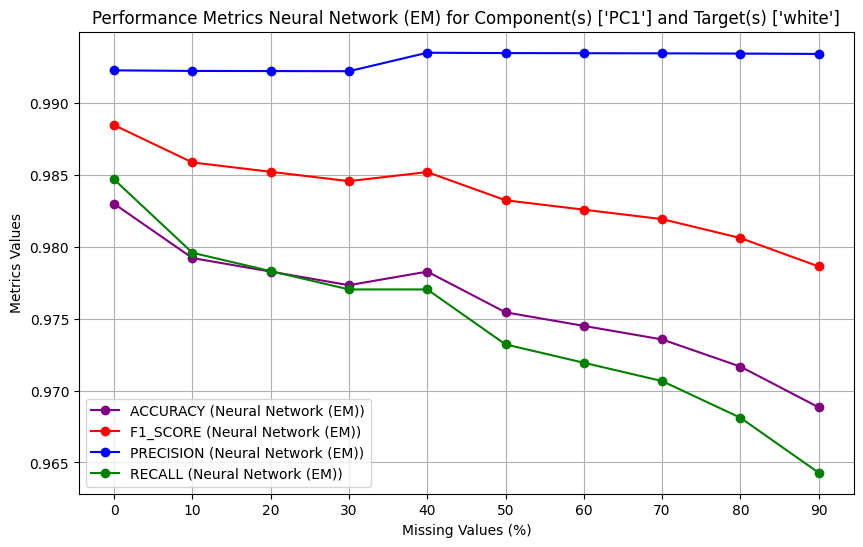

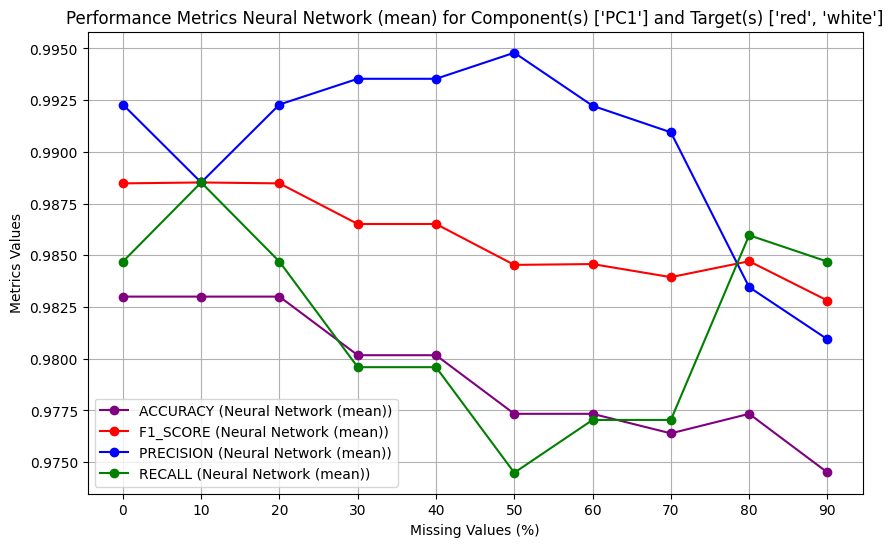

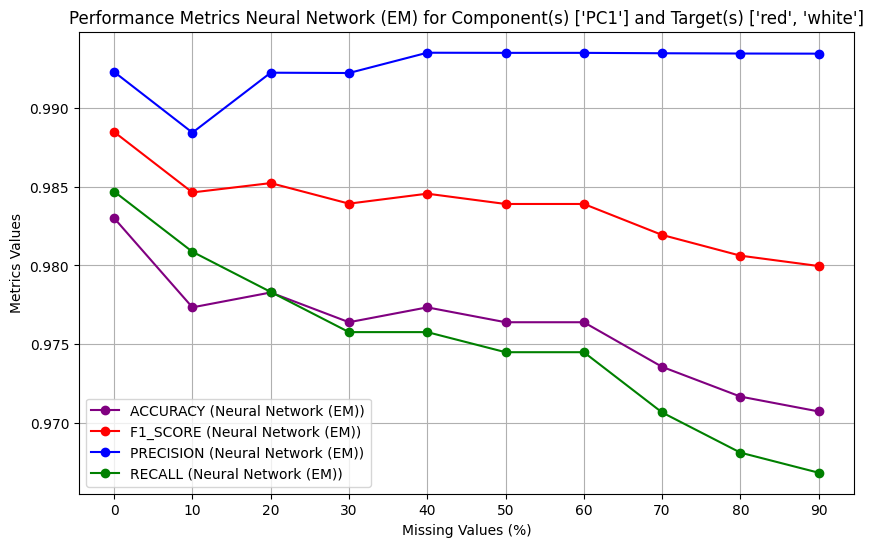

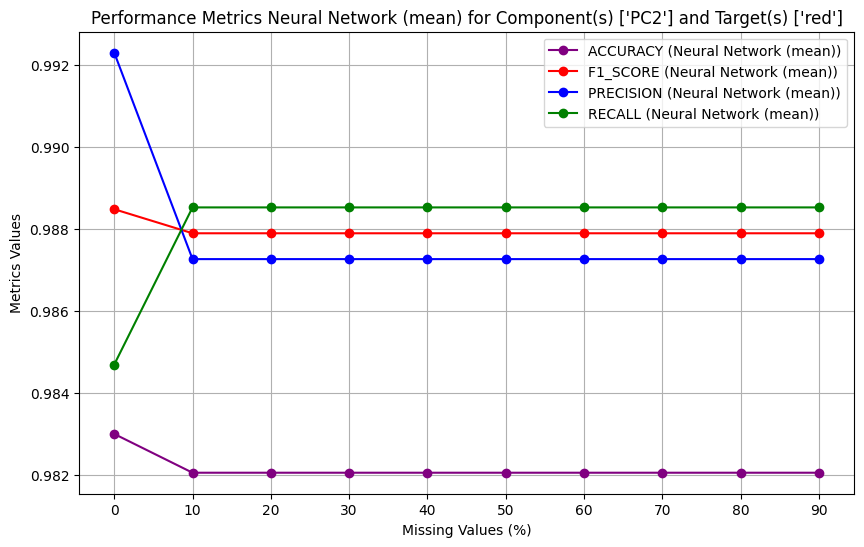

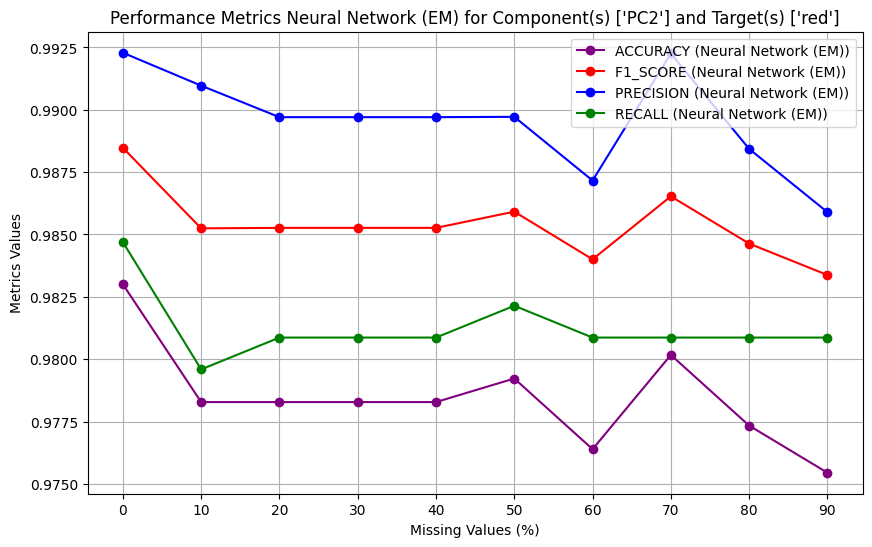

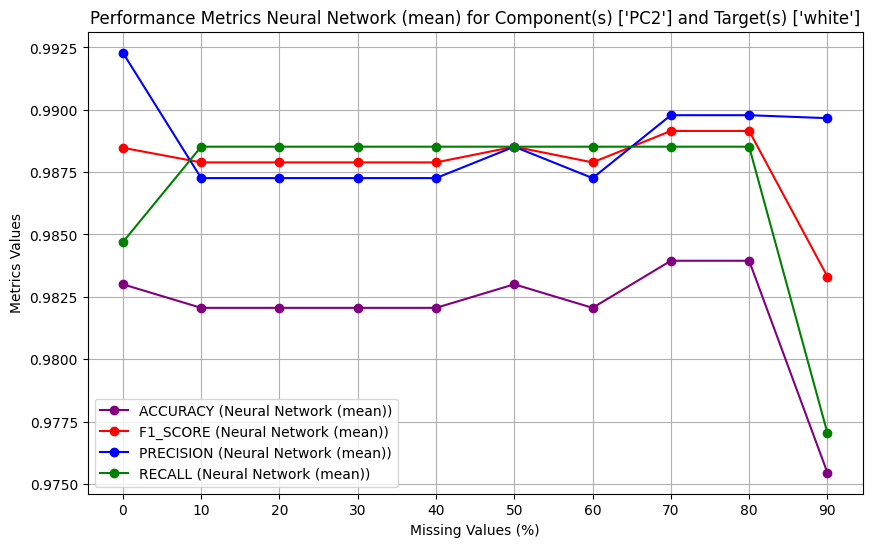

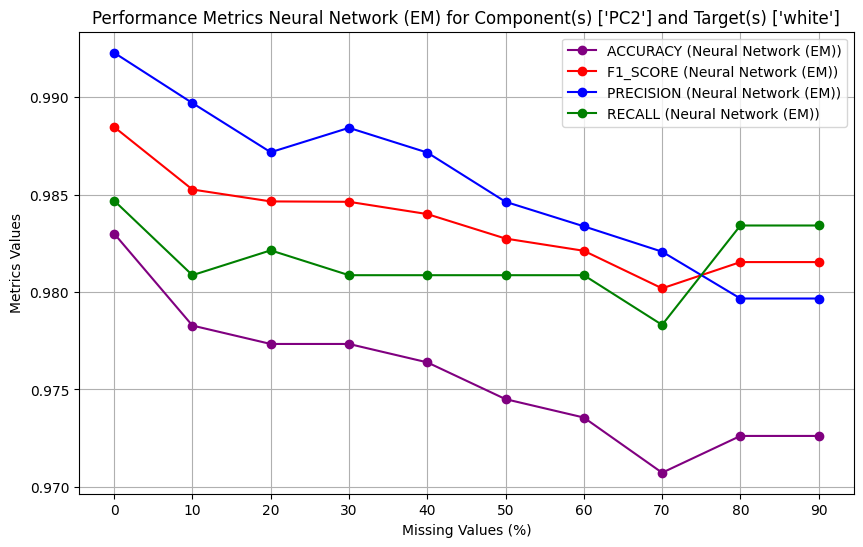

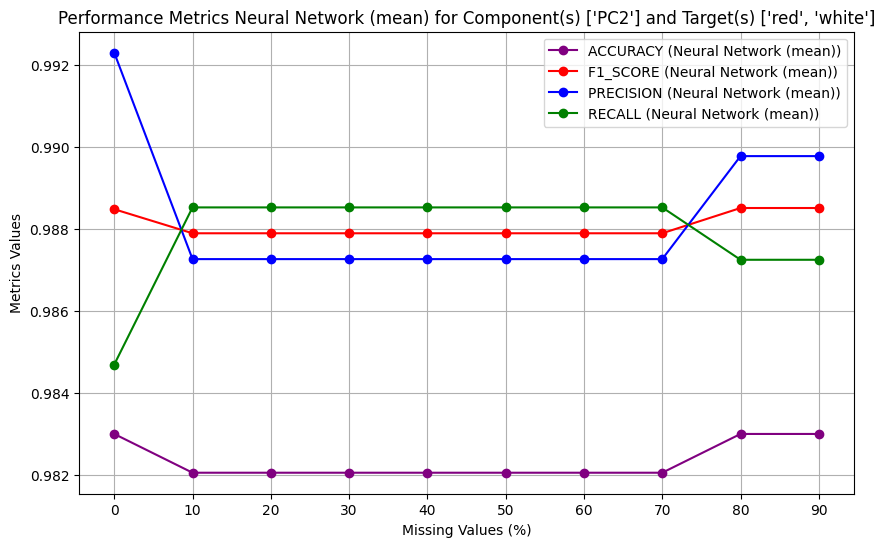

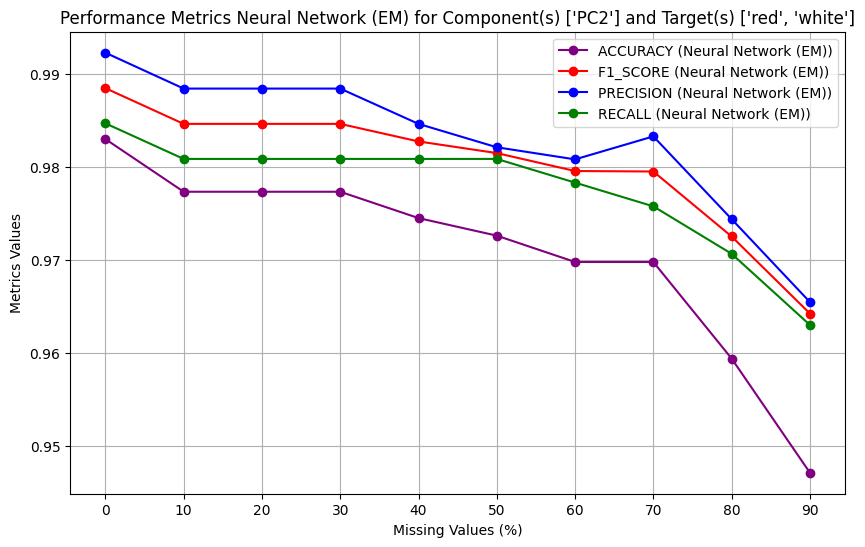

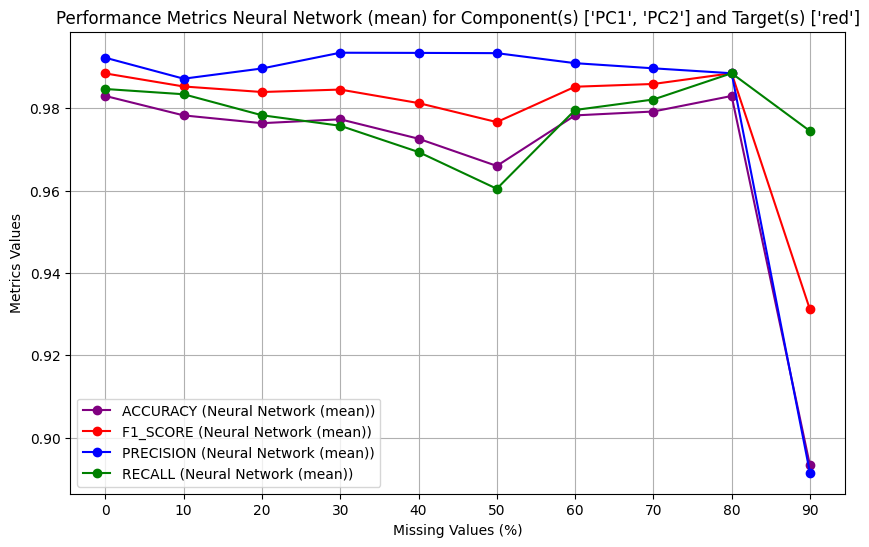

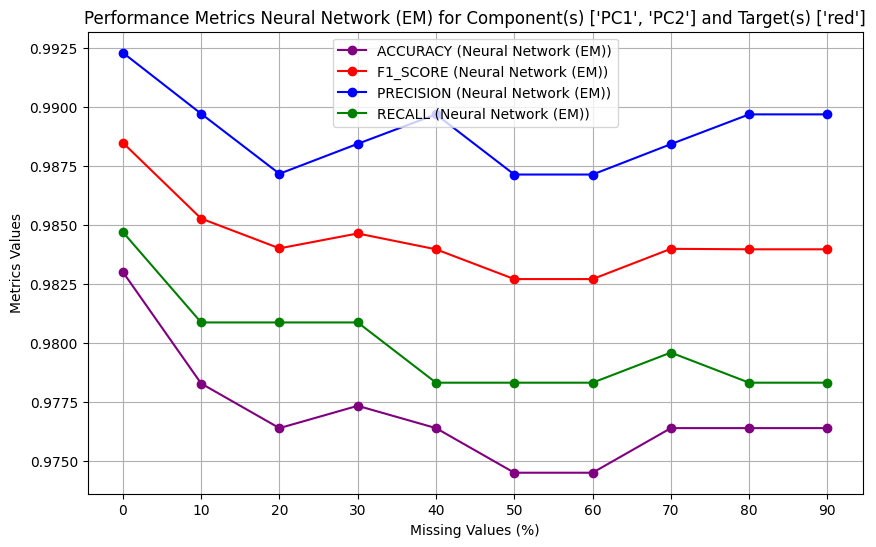

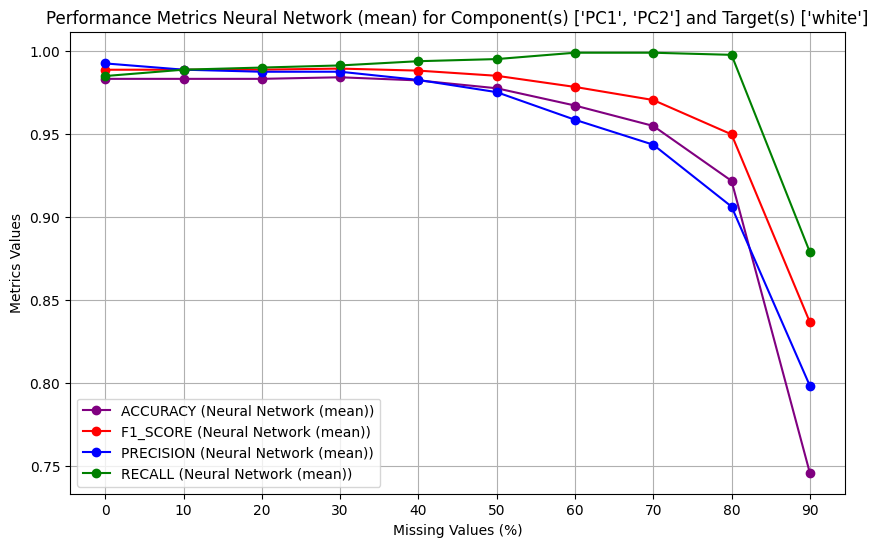

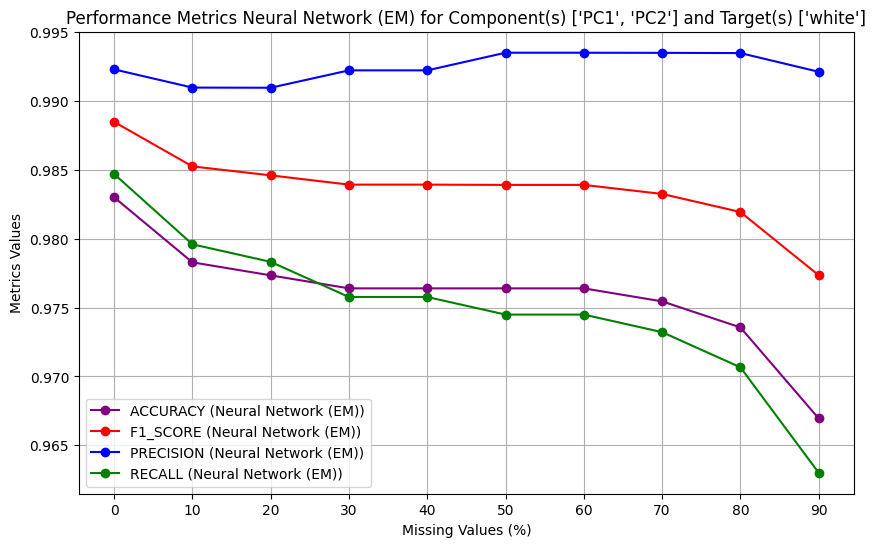

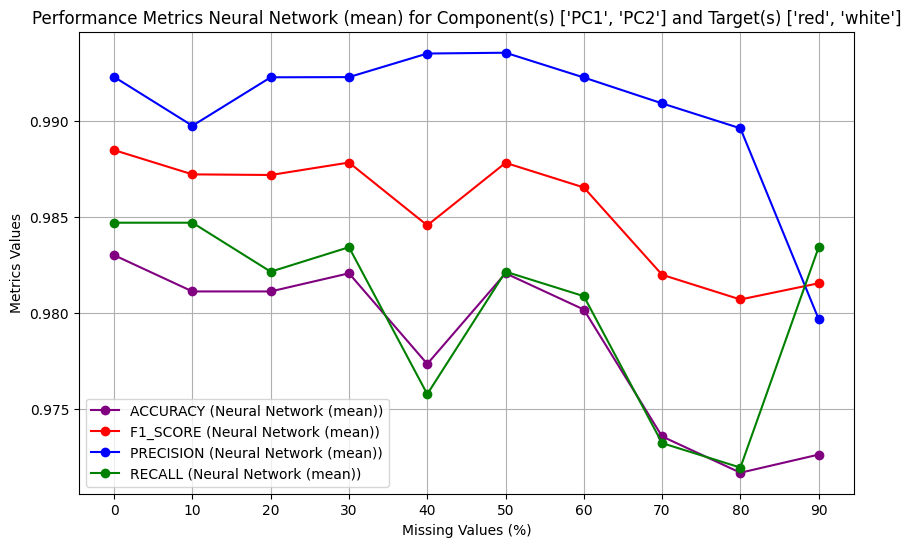

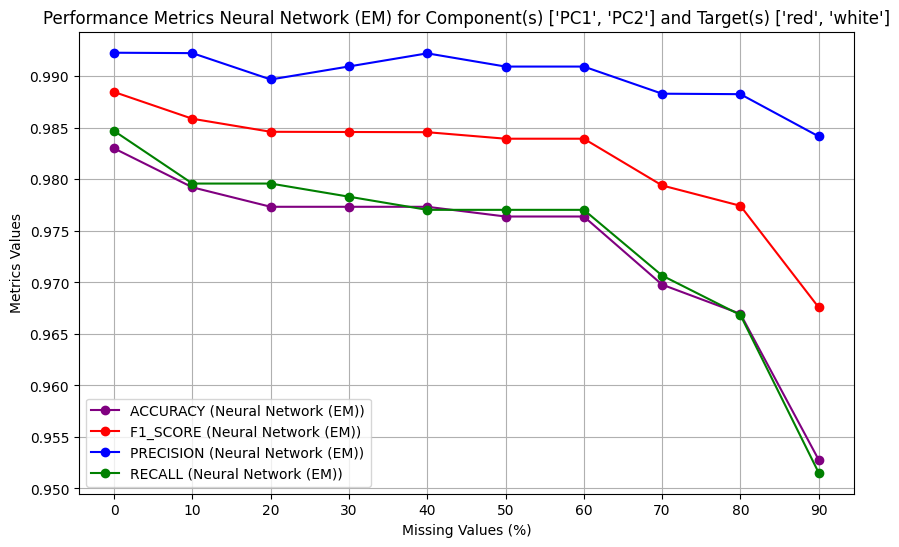

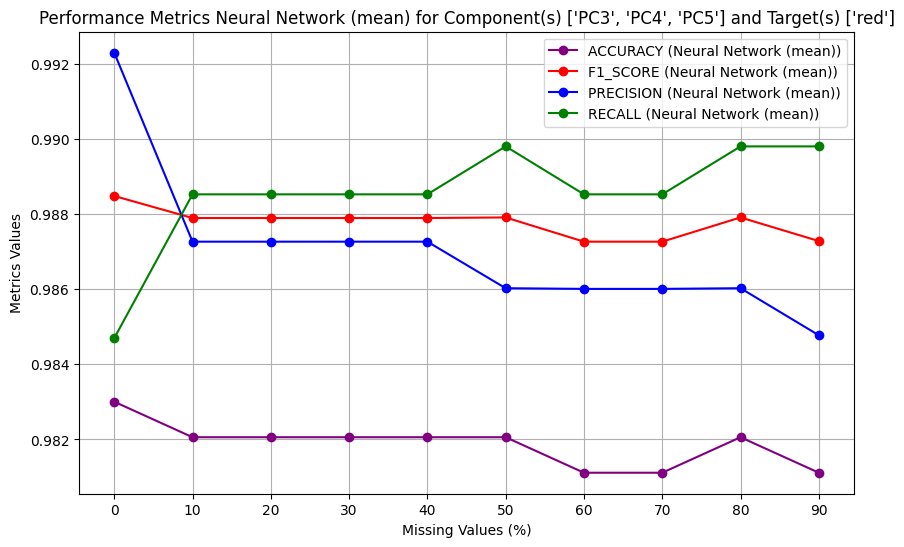

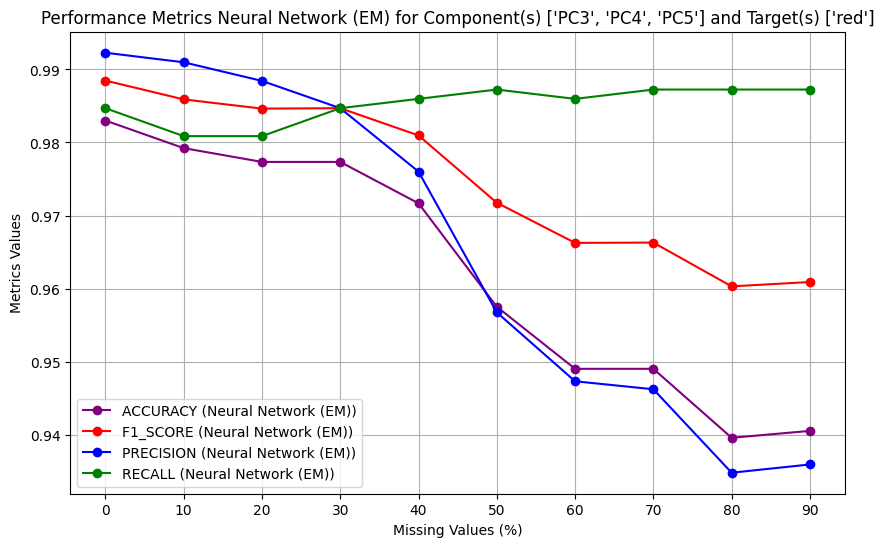

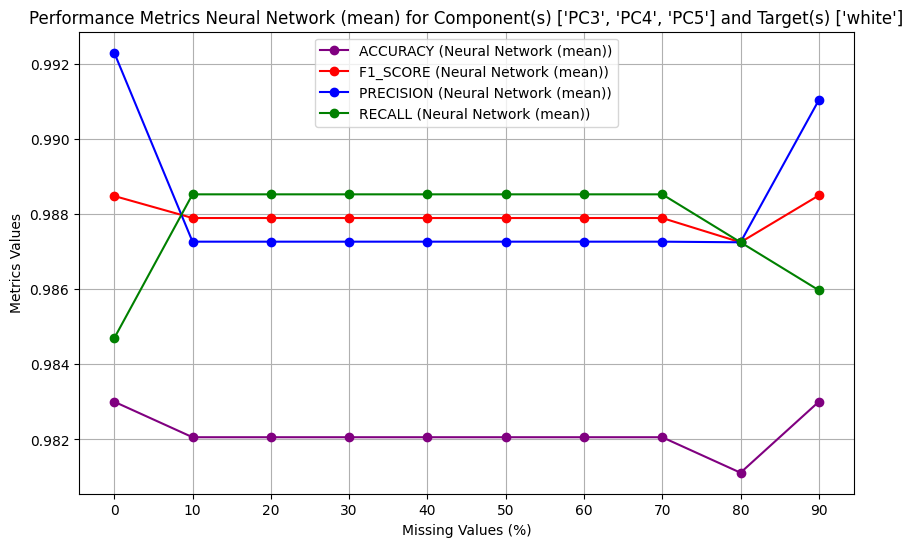

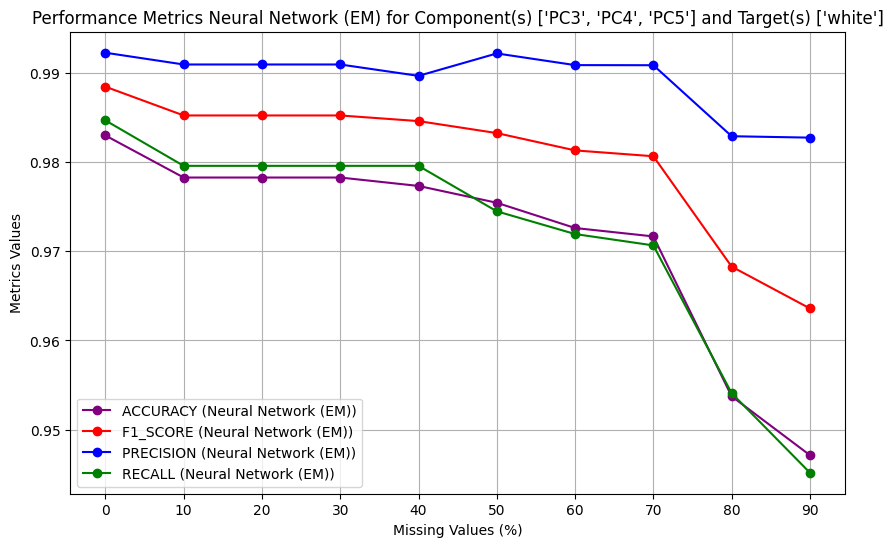

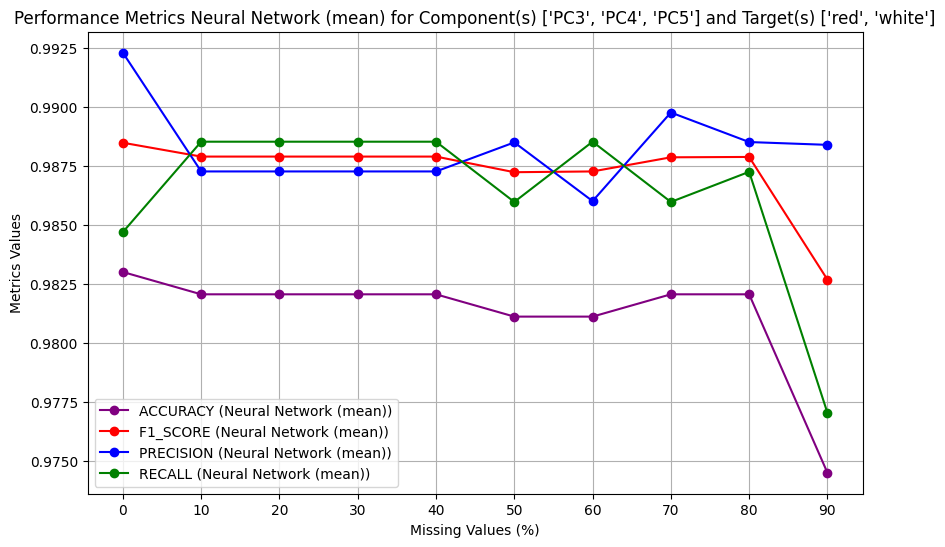

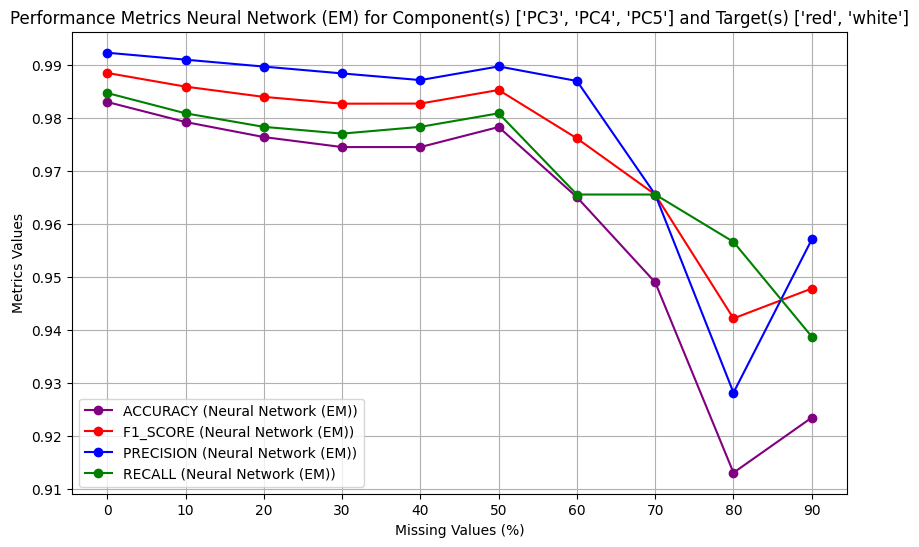

In [505]:
# Plot everything about Neural Network
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        for nn_type in ["Neural Network (mean)", "Neural Network (EM)"]:
            plot_missing_values_graph(nn_type, feature, wine_types)

#### Decision Tree

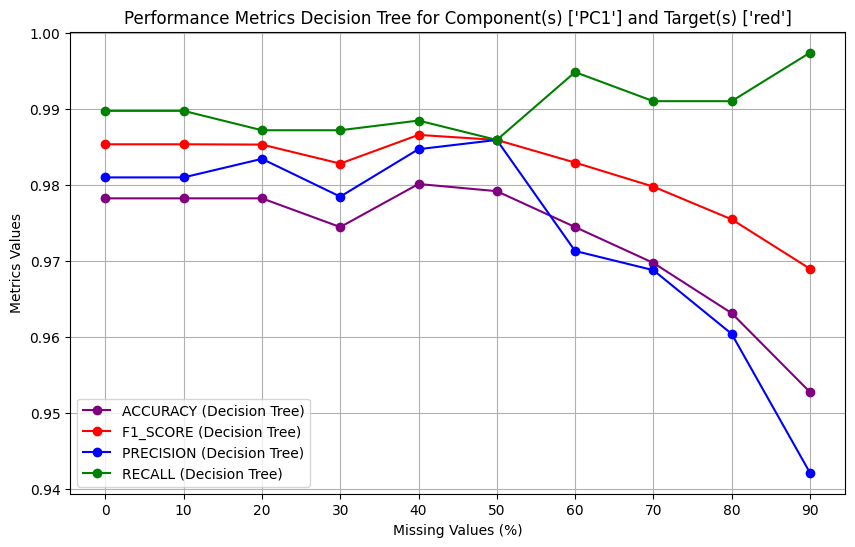

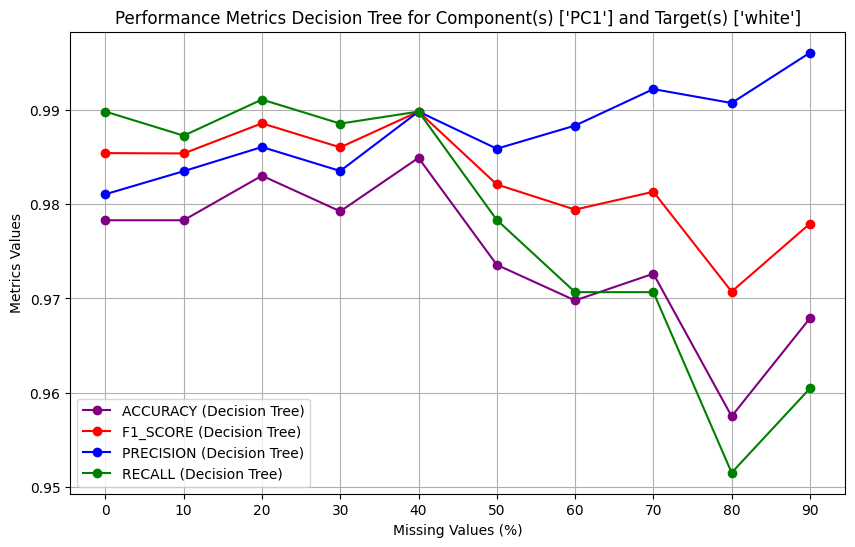

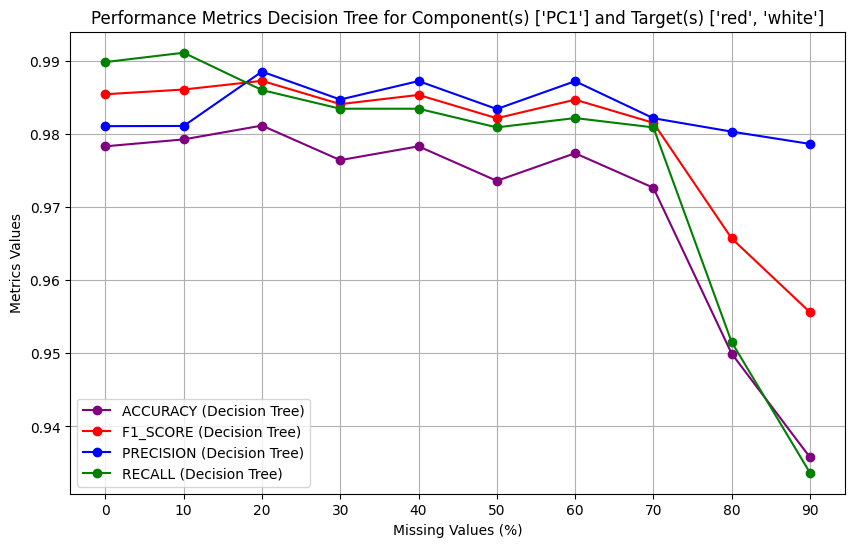

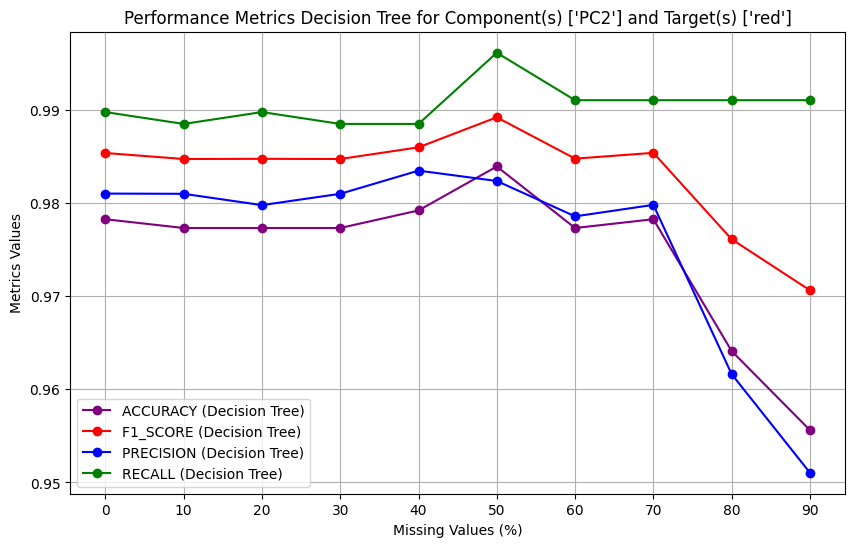

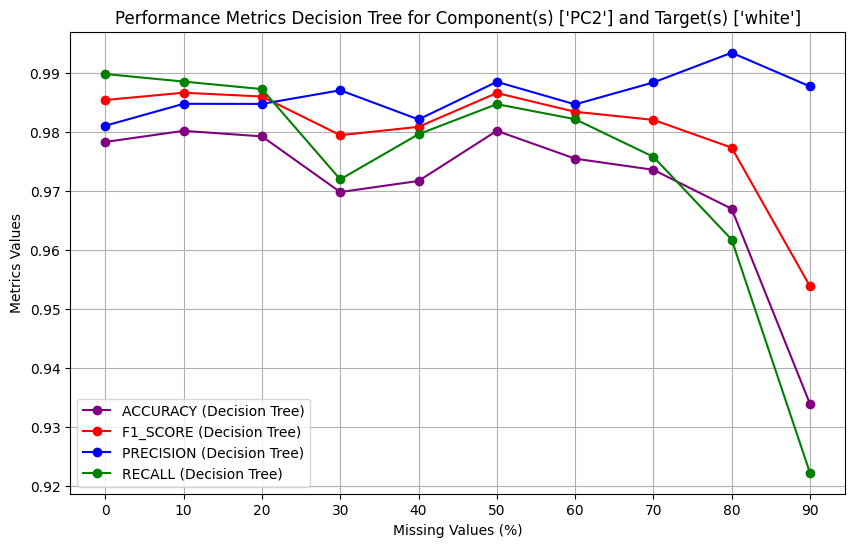

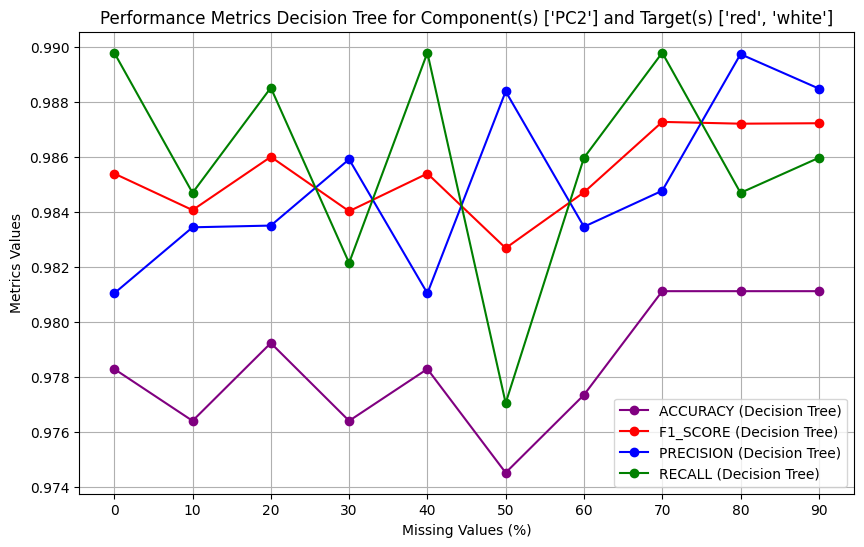

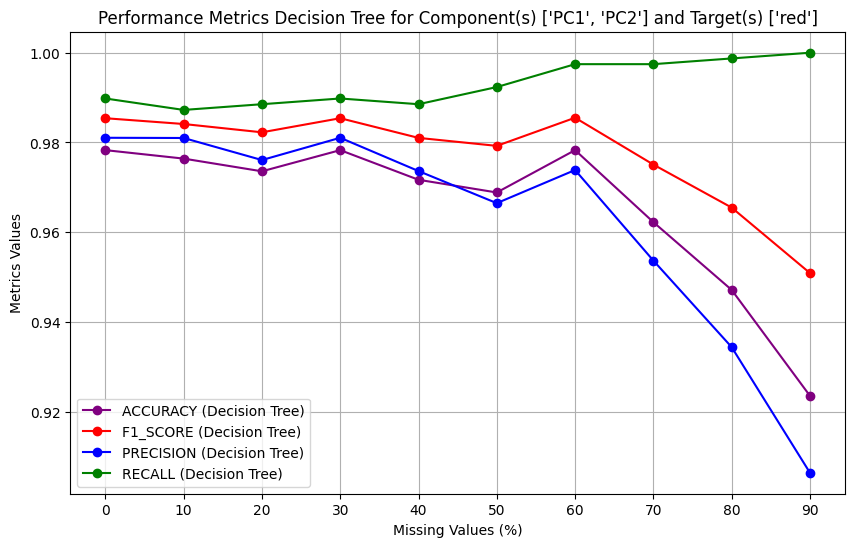

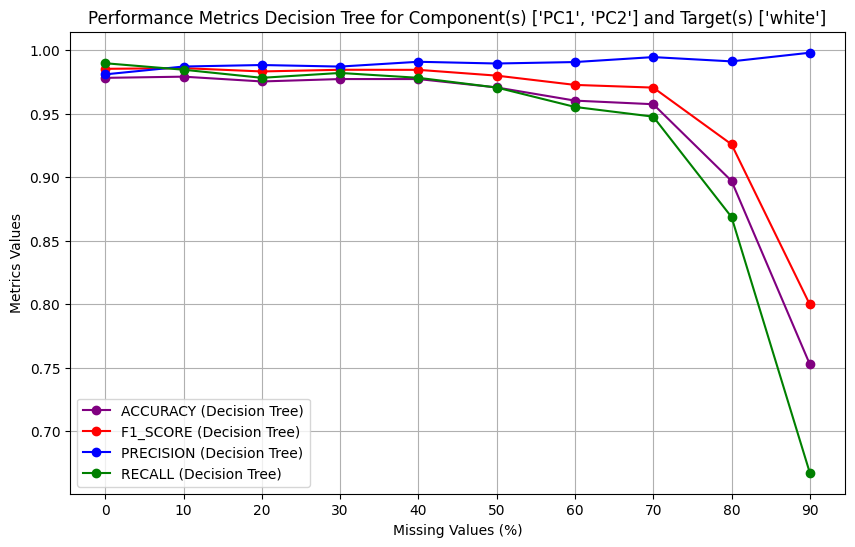

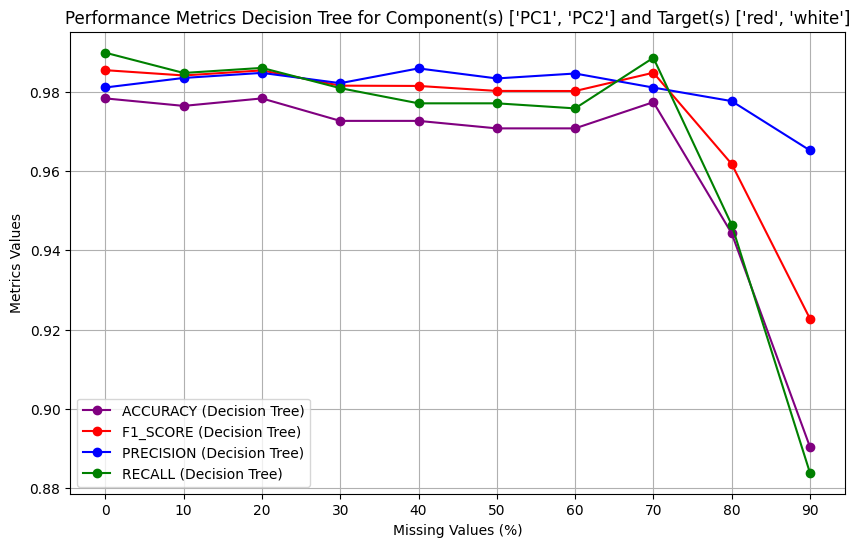

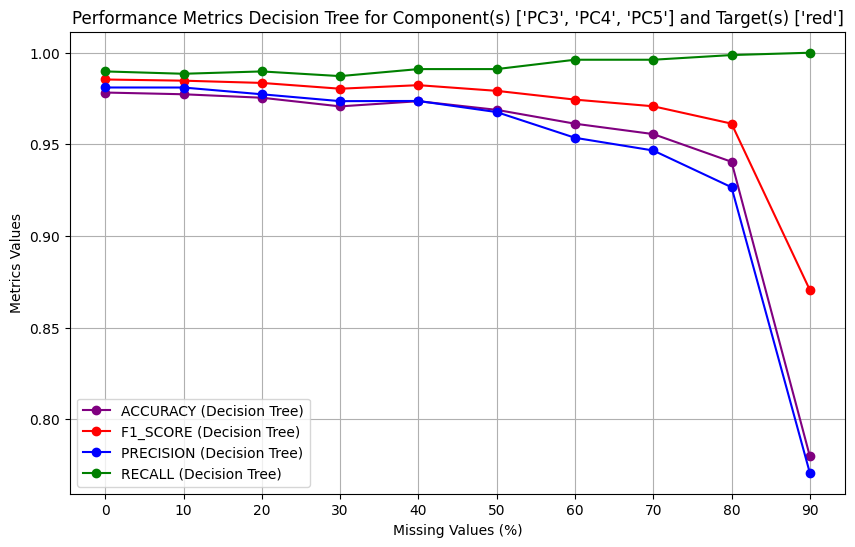

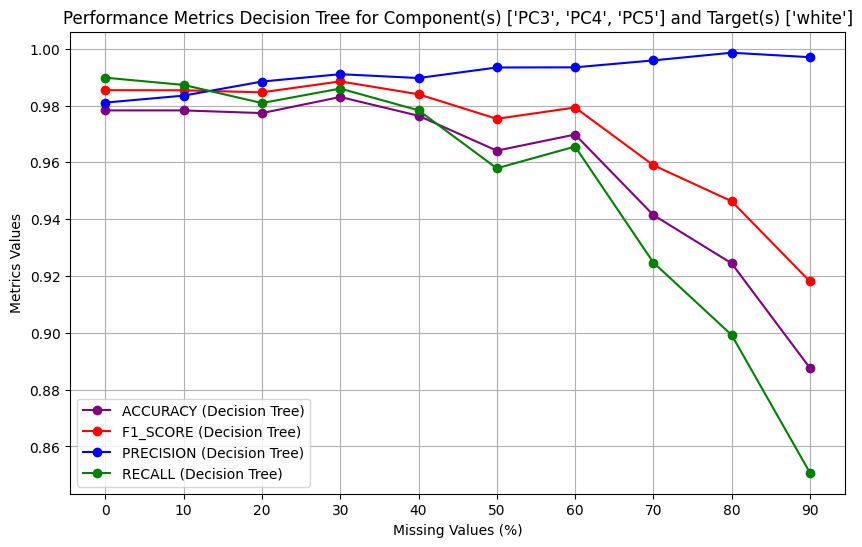

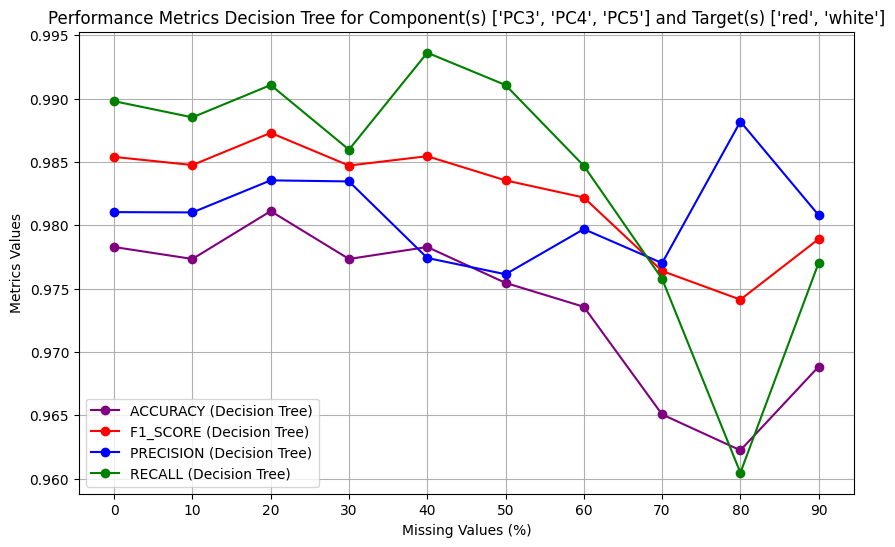

In [500]:
# Plot everything about Decision Tree
for feature in features_to_consider_list:
    for wine_types in wine_types_to_consider_list:
        plot_missing_values_graph("Decision Tree", feature, wine_types)

# Correlations

In [558]:
# Reason why we can't compare Decision Tree
df_original['model_name'].value_counts()

Decision Tree            659
SVM                      547
Neural Network           547
Neural Network (mean)    112
Neural Network (EM)      112
SVM (mean)               112
SVM (EM)                 112
Name: model_name, dtype: int64

## Correlations SVM vs NN

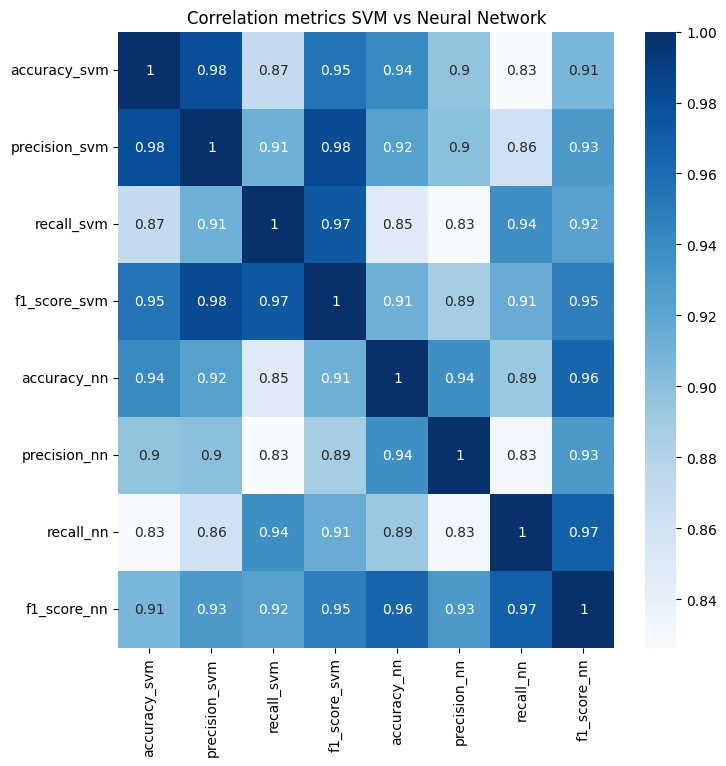

In [568]:
# Create dictionary containing the data
metrics_nn_svm = {}

for model in ['SVM', 'Neural Network']:
    model_name_short = 'svm' if model == 'SVM' else 'nn'
    for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        metrics_nn_svm[f"{metric}_{model_name_short}"] = sub_df_dict[model][metric].reset_index(drop=True)

# Convert to DataFrame
metrics_nn_svm = pd.DataFrame(metrics_nn_svm)

# Plot the correlations
plt.figure(figsize=(8,8))
plt.title("Correlation metrics SVM vs Neural Network")
sns.heatmap(metrics_nn_svm.corr(), annot = True, cmap = 'Blues');

## Correlations NN (mean) vs NN (EM)

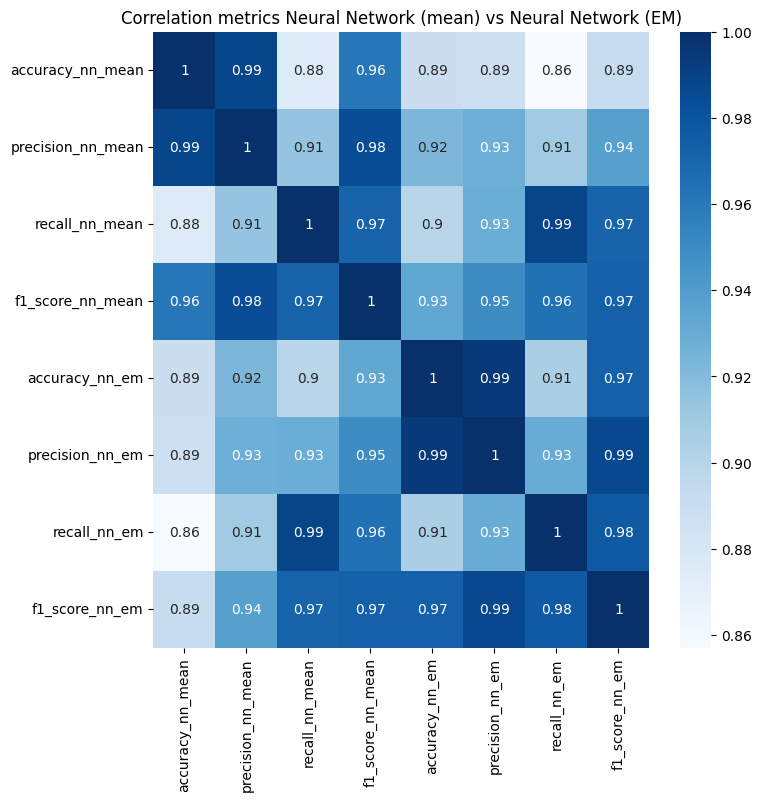

In [570]:
# Create dictionary containing the data
metrics_nn_nn = {}

for model in ['Neural Network (mean)', 'Neural Network (EM)']:
    model_name_short = 'nn_mean' if model == 'Neural Network (mean)' else 'nn_em'
    for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        metrics_nn_nn[f"{metric}_{model_name_short}"] = sub_df_dict[model][metric].reset_index(drop=True)

# Convert to DataFrame
metrics_nn_nn = pd.DataFrame(metrics_nn_nn)

# Plot the correlations
plt.figure(figsize=(8,8))
plt.title("Correlation metrics Neural Network (mean) vs Neural Network (EM)")
sns.heatmap(metrics_nn_nn.corr(), annot = True, cmap = 'Blues');

## Correlations SVM (mean) vs SVM (EM)

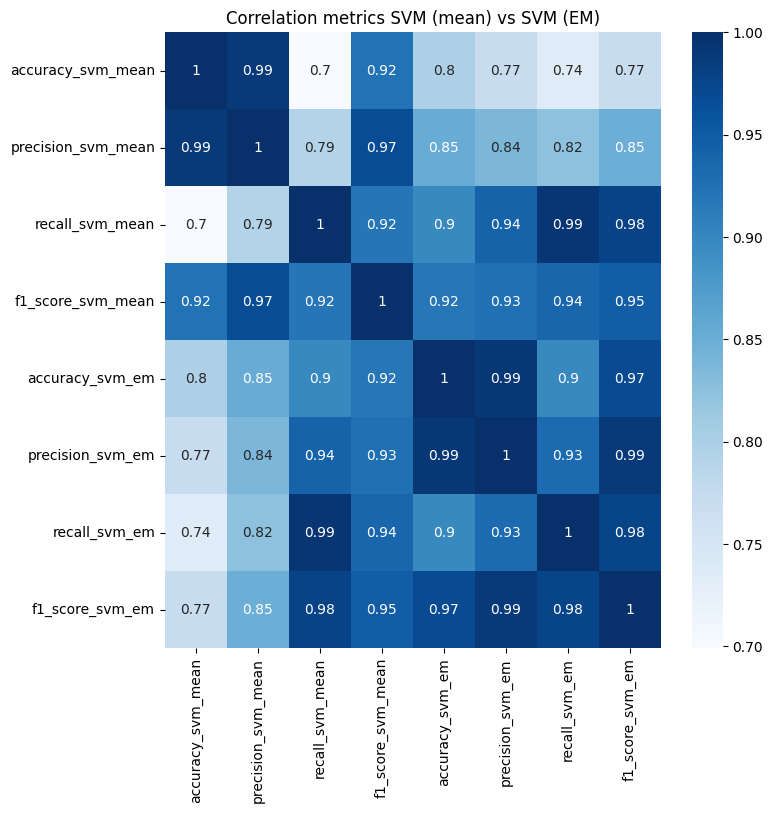

In [571]:
# Create dictionary containing the data
metrics_svm_svm = {}

for model in ['SVM (mean)', 'SVM (EM)']:
    model_name_short = 'svm_mean' if model == 'SVM (mean)' else 'svm_em'
    for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        metrics_svm_svm[f"{metric}_{model_name_short}"] = sub_df_dict[model][metric].reset_index(drop=True)

# Convert to DataFrame
metrics_svm_svm = pd.DataFrame(metrics_svm_svm)

# Plot the correlations
plt.figure(figsize=(8,8))
plt.title("Correlation metrics SVM (mean) vs SVM (EM)")
sns.heatmap(metrics_svm_svm.corr(), annot = True, cmap = 'Blues');

## Correlations SVM (mean) vs NN (mean)

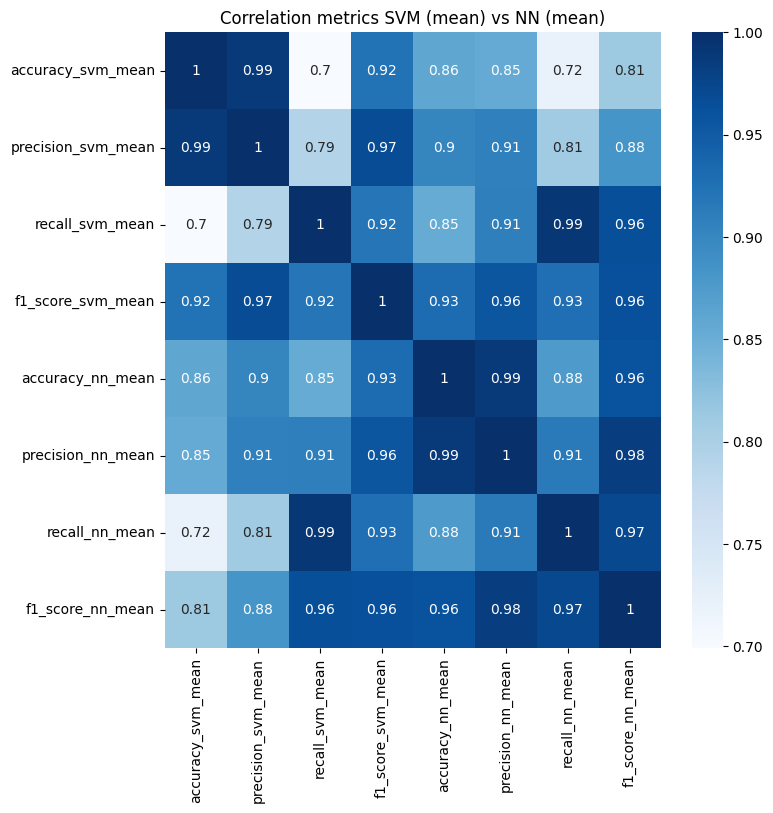

In [573]:
# Create dictionary containing the data
metrics_nn_svm_mean = {}

for model in ['SVM (mean)', 'Neural Network (mean)']:
    model_name_short = 'svm_mean' if model == 'SVM (mean)' else 'nn_mean'
    for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        metrics_nn_svm_mean[f"{metric}_{model_name_short}"] = sub_df_dict[model][metric].reset_index(drop=True)

# Convert to DataFrame
metrics_nn_svm_mean = pd.DataFrame(metrics_nn_svm_mean)

# Plot the correlations
plt.figure(figsize=(8,8))
plt.title("Correlation metrics SVM (mean) vs NN (mean)")
sns.heatmap(metrics_nn_svm_mean.corr(), annot = True, cmap = 'Blues');

## Correlations SVM (EM) vs NN (EM)

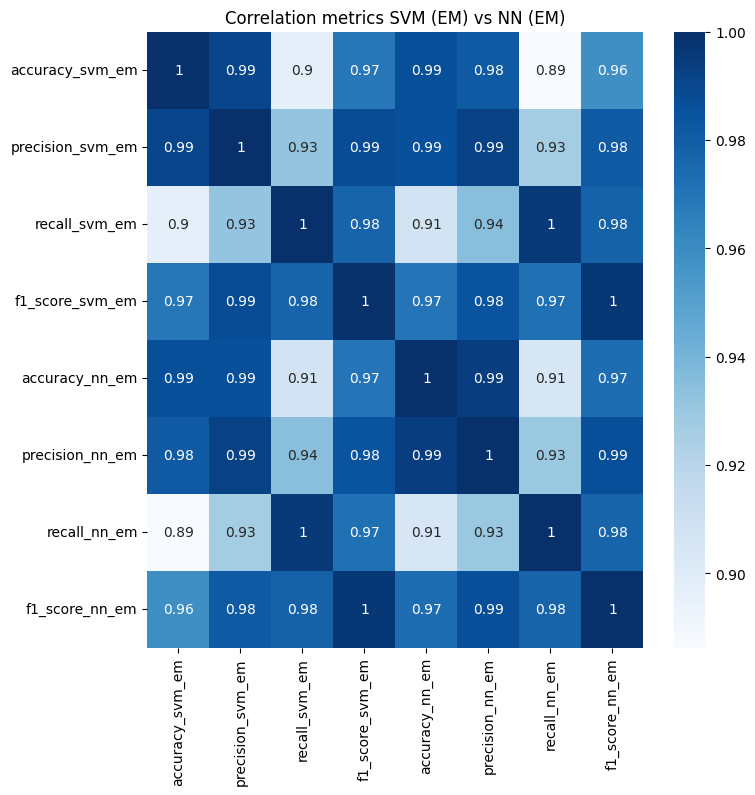

In [574]:
# Create dictionary containing the data
metrics_nn_svm_em = {}

for model in ['SVM (EM)', 'Neural Network (EM)']:
    model_name_short = 'svm_em' if model == 'SVM (EM)' else 'nn_em'
    for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        metrics_nn_svm_em[f"{metric}_{model_name_short}"] = sub_df_dict[model][metric].reset_index(drop=True)

# Convert to DataFrame
metrics_nn_svm_em = pd.DataFrame(metrics_nn_svm_em)

# Plot the correlations
plt.figure(figsize=(8,8))
plt.title("Correlation metrics SVM (EM) vs NN (EM)")
sns.heatmap(metrics_nn_svm_em.corr(), annot = True, cmap = 'Blues');